## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libaries to help with visualization of data
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split the data
from sklearn.model_selection import train_test_split

# Libraries to identify best pre-pruned tree using automated method
from sklearn.model_selection import GridSearchCV, cross_val_score

# Library to build model to perform prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libraries to get different scores for the models
from sklearn.metrics import (f1_score, precision_score, accuracy_score, recall_score, confusion_matrix)

# Library to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
# Read the csv file and load it into a dataframe
df = pd.read_csv('Loan_Modelling.csv')

# Create a copy of the data to avoid any changes to the original data
data = df.copy()

## Data Overview

* Observations
* Sanity checks

In [4]:
# Check the first 5 records in the data
data.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [5]:
# check the shape of the data
data.shape

(5000, 14)

*   Dataset has 5000 rows with data spread across 14 columns

In [6]:
# Check the data types of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


*   All the columns are integer except for CCAvg which is float
*   There are no null values in any of the columns

In [7]:
# Check the statistical summary of the data
data.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

*   The minimum value in Experience column is -3. This appears to be incorrect entry in the data
*   Income is ranging from 8K to 224K
*   Family size is ranging from 1 to 4
*   More than 75% of the customers do not have Personal Loan, Securities Account and CD Account
*   At least 50% of the customers use internet banking facilities

In [8]:
# Check for any duplicate rows
data.duplicated().sum()

0

*   There are no duplicate records in the dataset

In [9]:
# Check the counts of unique values in each column
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

*   Family, Education, Personal_Loan, Securities_Account, CD_Account, Online and CreditCard have very limited number of unique values and can be considered as categorical columns
*   Other columns would be considered as continuous columns

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [10]:
# ID column has unique value across all records. This column will not add any value to the model, and hence we can drop the column
data.drop('ID', axis=1, inplace=True)

In [11]:
# As noted in the statistical summary, Experience appears to have negative values. These appear to be typing mistakes in data entries.
# Let's check unique values for Experience
data.Experience.unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [12]:
# Let's change them to positive values
data.Experience = data.Experience.abs()
data.Experience.unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43])

### Univariate analysis

In [13]:
# Define a method to create boxplot and histogram in the same plot to perform univairate analysis for continuous variables
def boxplot_and_histogram(data, column, figsize=(10,7)):
    # Design the subplot by creating 2 plots in 2 different rows, by sharing the x axis
    fig, (boxplot_ax, histplot_ax) = plt.subplots(2, 1, figsize=figsize, height_ratios=[0.3, 0.7], sharex=True)

    # Draw boxplot for the input column
    sns.boxplot(data=data, x=column, ax=boxplot_ax, color='Pink', showmeans=True)

    # Draw histogram for the input column
    sns.histplot(data=data, x=column, ax=histplot_ax, palette='Winter', kde=True)

    # Draw a line with red colot on the histogram to show the mean
    histplot_ax.axvline(x=data[column].mean(), color='Red', linestyle=':')

    # Draw a line with red colot on the histogram to show the median
    histplot_ax.axvline(x=data[column].median(), color='Black')

In [14]:
# Define a method to create labeled barplots to perform univariate analysis for categorical variables
def labeled_barplot(data, column, figsize=(8,6)):
    plt.figure(figsize=figsize)

    # Create a countplot and order the bars based with the bar having highest count on the left
    plot = sns.countplot(data=data, x=column, order=data[column].value_counts().index, palette='Spectral')

    # Display the % of of value at the top of the bar
    total_values = len(data[column])
    for container in plot.containers:
        heights = [patch.get_height() for patch in container.patches]
        normalized_heights = [height*100/total_values for height in heights]
        plot.bar_label(container, normalized_heights)

    plt.show()

#### Age

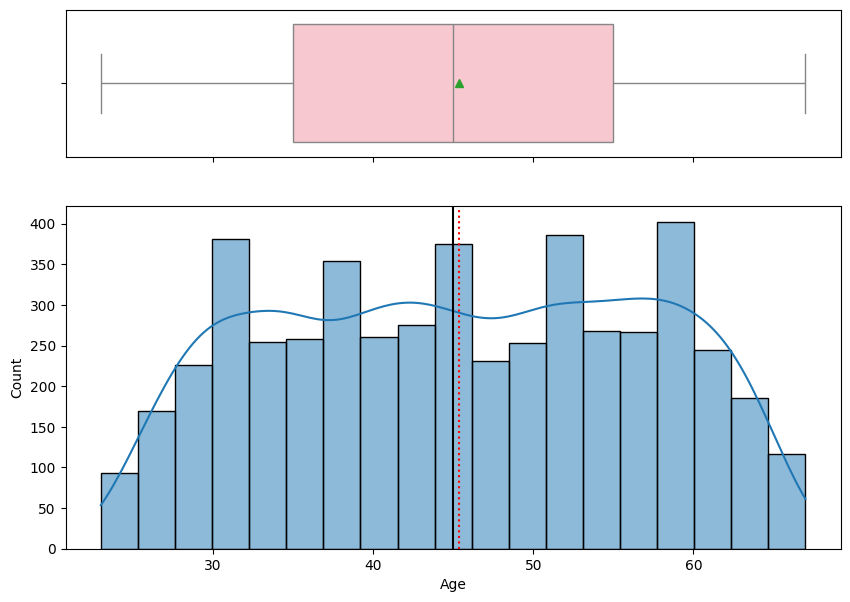

In [15]:
# Draw boxplot and histogram for Age
boxplot_and_histogram(data, 'Age');

* Age is almost normally distributed, with mean and median apporximately equal to 45 years

#### Experience

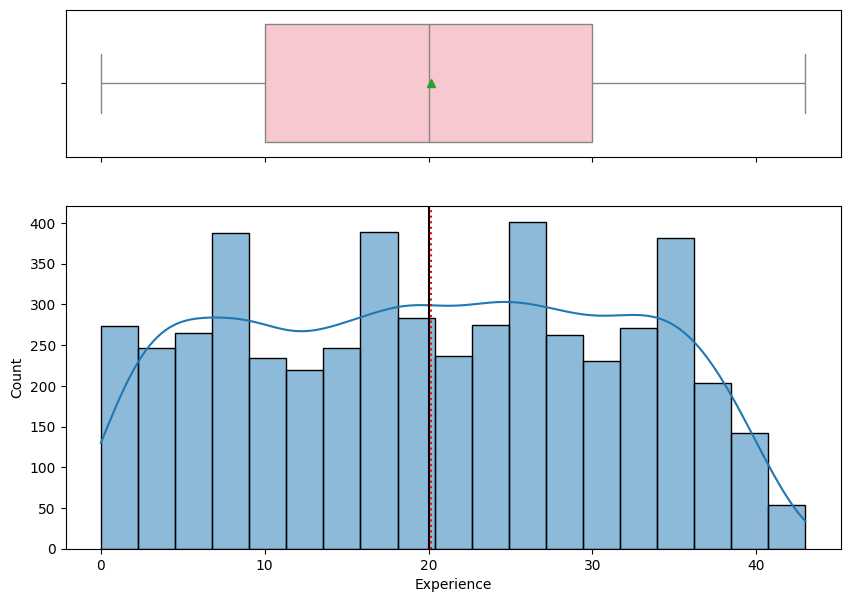

In [16]:
# Draw boxplot and histogram for Experience
boxplot_and_histogram(data, 'Experience');

* Experience is almost normally distributed with a mean and median of about 20 years

#### Income

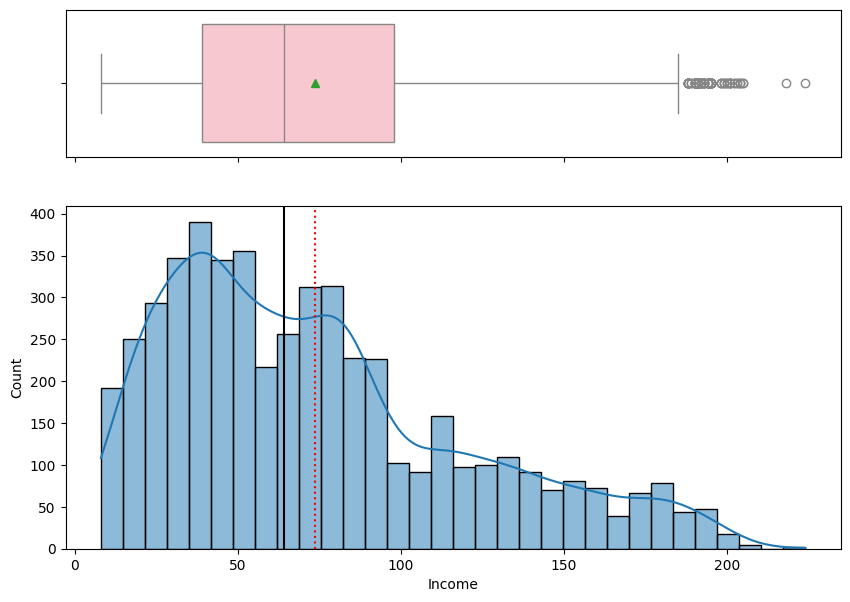

In [17]:
# Draw boxplot and histogram for Income
boxplot_and_histogram(data, 'Income');

* Income is right skewed with a median income of about 64K and mean income of about 74K
* There are many outliers with higher income

#### CC Avg

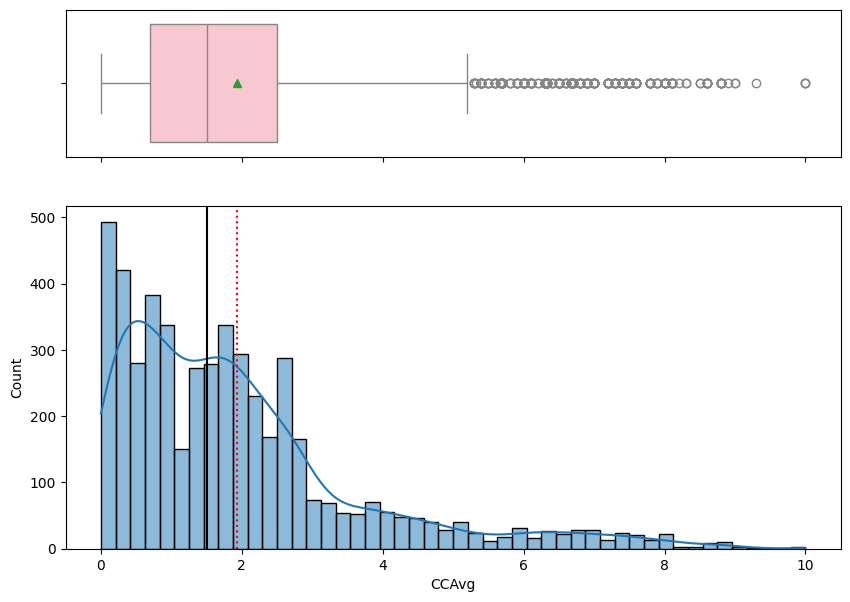

In [18]:
# Draw boxplot and histogram for Average Spending on credit cards per month
boxplot_and_histogram(data, 'CCAvg');

* Average credit card spending per month is right skewed
* There are many outliers with average spending of more than 5K

#### Mortgage

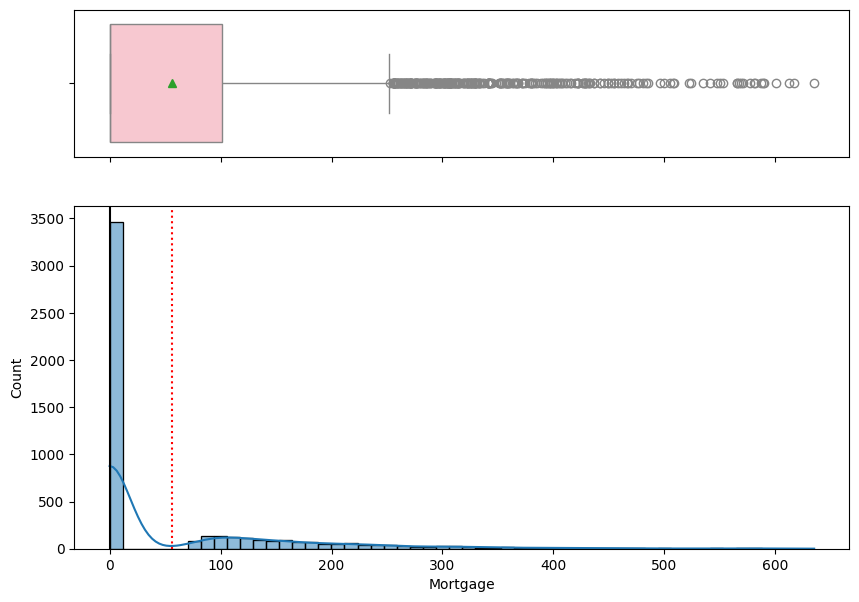

In [19]:
# Draw boxplot and histogram for Mortgage
boxplot_and_histogram(data, 'Mortgage');

* Mortgage is heavily skewed towards right
* There are a lot of outliers having a mortgage of more than 250K

#### Family

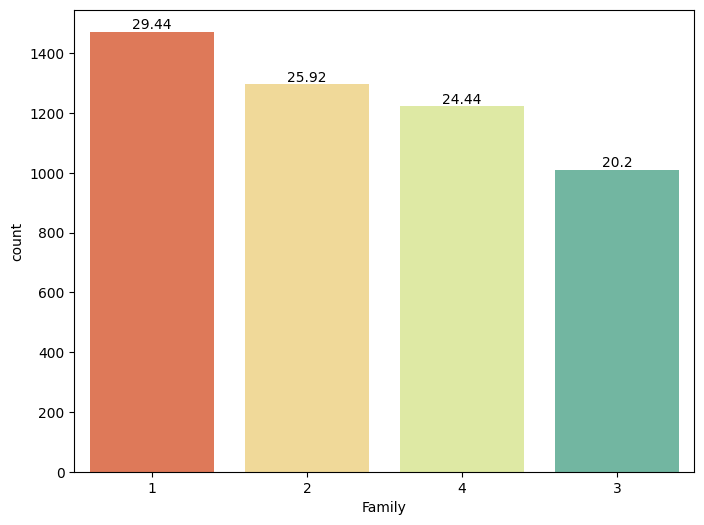

In [20]:
# Draw bar plot for Family
labeled_barplot(data, 'Family');

* Single customers form the higest percentage of the customer base at 29.44%
* Customers with family size of 2 and 3 follow at 25.92% and 24.44% respectively
* Customers with family size of 4 are at 20.2%

#### Education

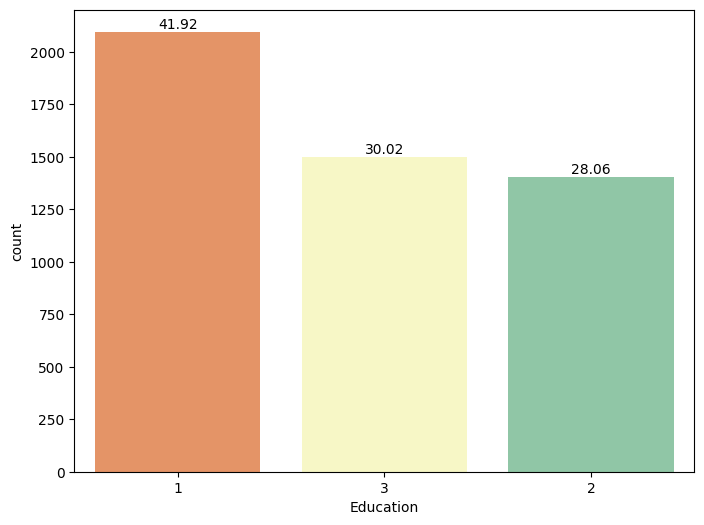

In [21]:
# Draw bar plot for Education
labeled_barplot(data, 'Education');

* Undergrad customers form the highest percentage of the customer base at 41.92%
* Graduated customers account for 30.2%
* 28.06% of the customers have Advanced/Progression level of education

#### Personal loan

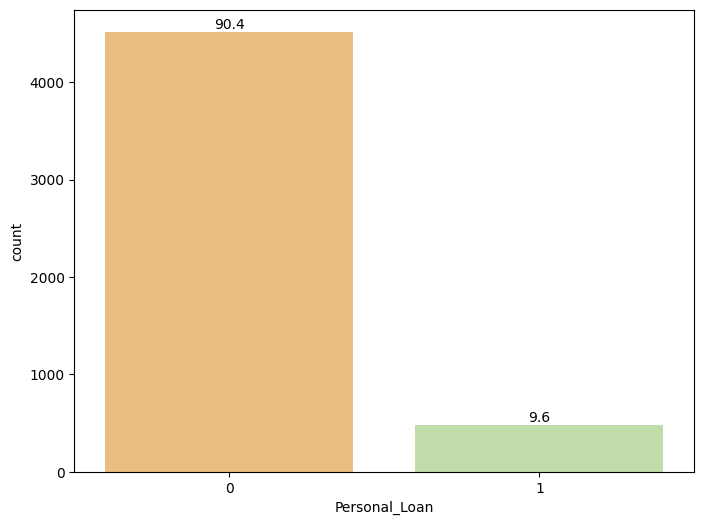

In [22]:
# Draw bar plot for Personal loan
labeled_barplot(data, 'Personal_Loan');

* 90.4% of the customers have not taken a personal loan
* Only 9.6% of the customers have taken a personal loan

#### Securities Account

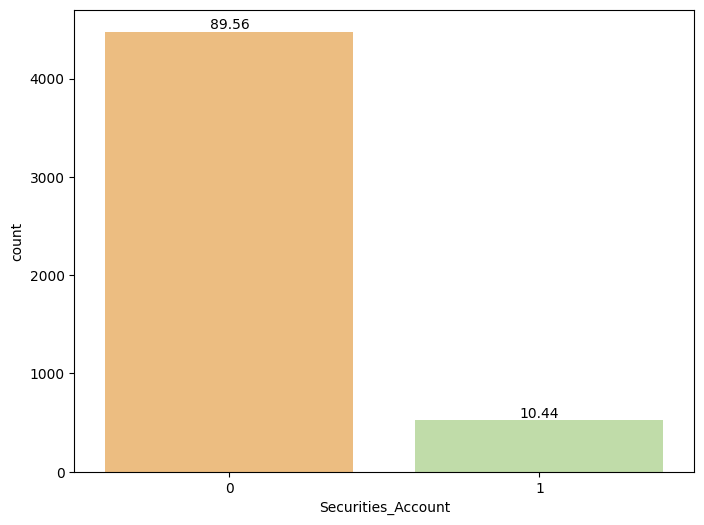

In [23]:
# Draw bar plot for Securities Account
labeled_barplot(data, 'Securities_Account');

* 89.56% of the customers do not have any securities account with the bank
* 10.44% of the customers have securities account

#### CD Account

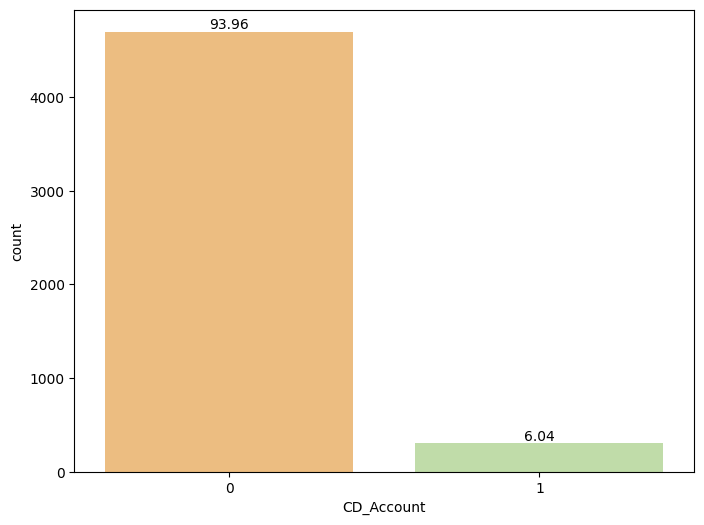

In [24]:
# Draw bar plot for CD Account
labeled_barplot(data, 'CD_Account');

* 93.96% of the customers do not have any CD Account in the bank
* Only 6.04% of the customers have a CD account in the bank

#### Online

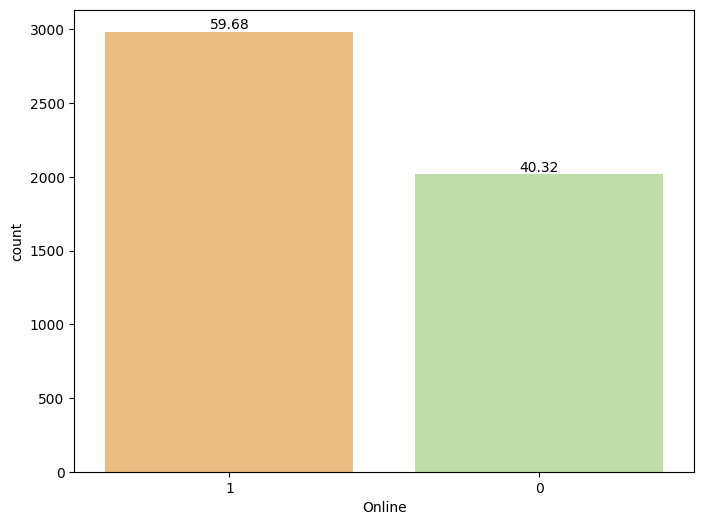

In [25]:
# Draw bar plot for Online
labeled_barplot(data, 'Online');

* Internet banking faciliy is being used by about 40.32% of the customers

#### Credit Card

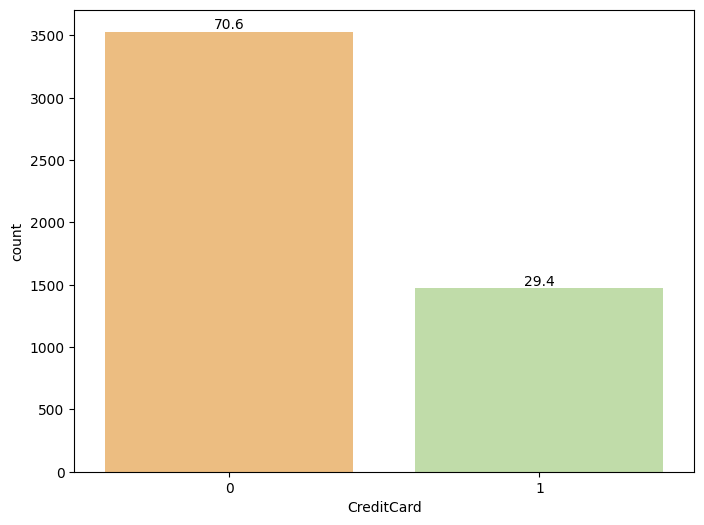

In [26]:
# Draw bar plot for Credit Card
labeled_barplot(data, 'CreditCard');

* 29.4% customers use credit card issues by other banks

#### Zip Code

In [27]:
# Get unique values of ZIPCode
data['ZIPCode'].unique()

array([91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 93023,
       94710, 90277, 93106, 94920, 91741, 95054, 95010, 94305, 91604,
       94015, 90095, 91320, 95521, 95064, 90064, 94539, 94104, 94117,
       94801, 94035, 92647, 95814, 94114, 94115, 92672, 94122, 90019,
       95616, 94065, 95014, 91380, 95747, 92373, 92093, 94005, 90245,
       95819, 94022, 90404, 93407, 94523, 90024, 91360, 95670, 95123,
       90045, 91335, 93907, 92007, 94606, 94611, 94901, 92220, 93305,
       95134, 94612, 92507, 91730, 94501, 94303, 94105, 94550, 92612,
       95617, 92374, 94080, 94608, 93555, 93311, 94704, 92717, 92037,
       95136, 94542, 94143, 91775, 92703, 92354, 92024, 92831, 92833,
       94304, 90057, 92130, 91301, 92096, 92646, 92182, 92131, 93720,
       90840, 95035, 93010, 94928, 95831, 91770, 90007, 94102, 91423,
       93955, 94107, 92834, 93117, 94551, 94596, 94025, 94545, 95053,
       90036, 91125, 95120, 94706, 95827, 90503, 90250, 95817, 95503,
       93111, 94132,

* Although Zip Code is an integer column, the values in this column should be considered as categorical value as it zip code represents an area.
* ZIPCode column has 467 unique values. Using one-hot encoding on these many values with create 467 columns in the data, which is not efficient. Let's take the first 2 digits of the zip code to consider the broader geographical regions instead of individual regions

In [28]:
# Convert ZIPCode column to a string to treat it as a categorical column
data['ZIPCode'] = data['ZIPCode'].astype(str)

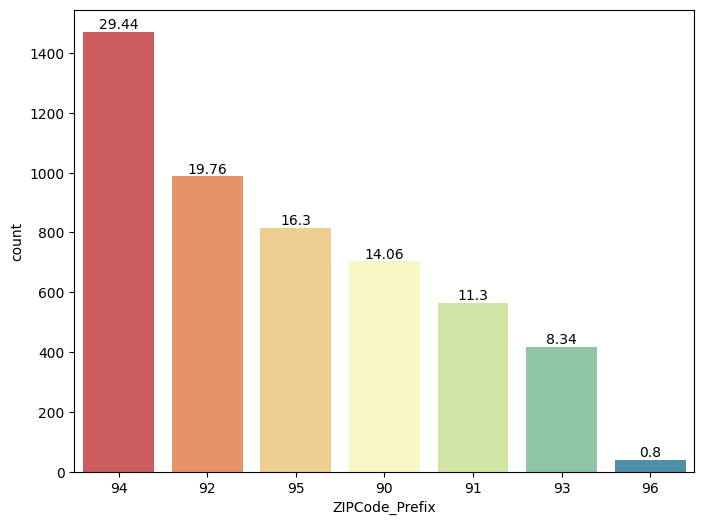

In [29]:
# Extract the first 2 characters of the zip code to consider the borader geographical regions
data['ZIPCode_Prefix'] = data['ZIPCode'].str[:2]

# Draw a bar plot for the zip code prefixes
labeled_barplot(data, 'ZIPCode_Prefix')

* Zipcodes starting with 94 cover about 29.44% of all customers
* Zipcodes starting with 96 cover only about 0.8% of customers

### Bivariate Analysis

In [30]:
# Draw stacked bar plots for categorical data
def stacked_barplot(data, column, target):
    # Find the value in the target column with the lowest frequency, and use it in cross tab to sort the bards
    sortby = data[target].value_counts().index[-1]

    # Create a crosstab to identify the split of target data across the values in the independent column
    tab = pd.crosstab(data[column], data[target], margins=True).sort_values(by=sortby, ascending=False)

    # Calculate the % of loans taken and loans not taken for each value in the independent column
    tab['No_Loan_Percent'] = tab[0]/tab['All']
    tab['Loan_Percent'] = tab[1]/tab['All']

    # Print the crosstab to view the split of target data across the values in the independent column
    print(tab)
    print('='*100)

    # Create another cross tab to identify the % split of the target data across the values in the independent column
    tab_normalized = pd.crosstab(data[column], data[target], normalize=True).sort_values(by=sortby, ascending=False)

    # Create a stacked bar plot to show the split of data
    tab_normalized.plot(kind="bar", stacked=True)

    plt.legend(loc="upper left", bbox_to_anchor=(1, 1)) # Adjusted bbox_to_anchor to move legend outside
    plt.tight_layout() # Use tight_layout to adjust plot parameters for a tight layout.
    plt.show()

In [31]:
def histplot_boxplot_wrt_target(data, column, target):
    # Create 2 subplots to draw the histograms with respect to the target variable
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    # Get the unique values of the target variable
    unique_target = data[target].unique()

    # Generate histograms for the independent variables for each unique value of the target column
    sns.histplot(data=data[data[target] == unique_target[0]], x=column, kde=1, ax=axes[0])
    axes[0].set_title('Distribution of ' + str(column) + ' for ' + target + '= ' + str(unique_target[0]))

    sns.histplot(data=data[data[target] == unique_target[1]], x=column, kde=1, ax=axes[1])
    axes[1].set_title('Distribution of ' + str(column) + ' for ' + target + '= ' + str(unique_target[1]))

    plt.show()

    # Draw boxplot for the independent column with respect to the target column
    sns.boxplot(data=data, x=target, y=column, palette='Spectral')


#### Personal Loan Vs Age

Let's see how does the distribution of Age varies depending on whether customers have personal loan or not

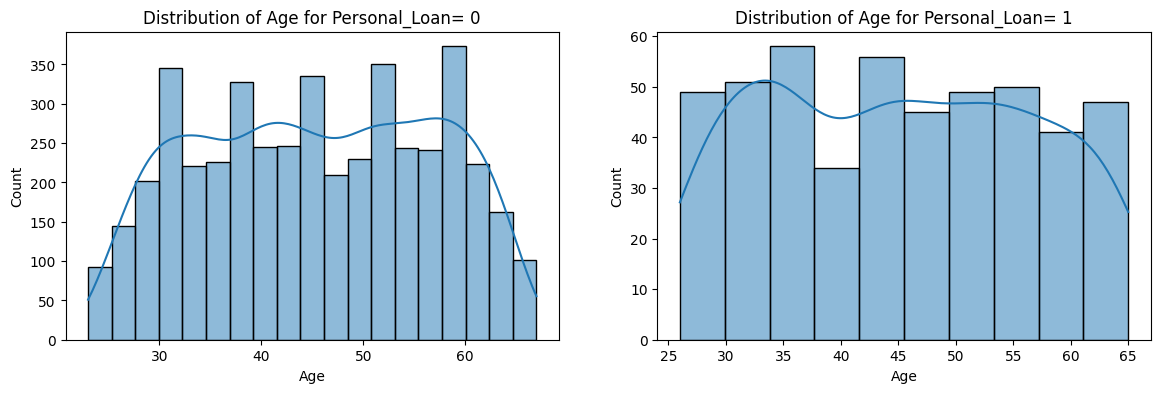

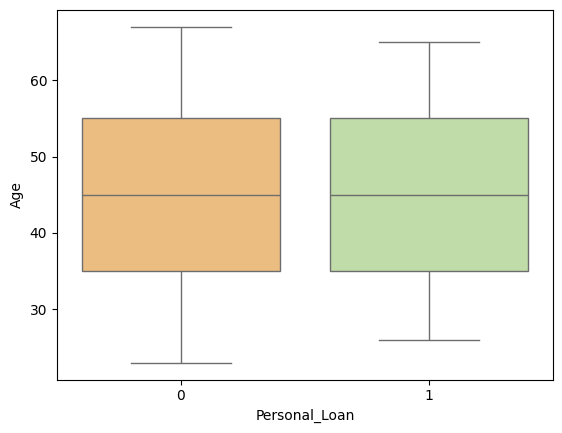

In [32]:
# Draw plots for age with respect to personal loan
histplot_boxplot_wrt_target(data, 'Age', 'Personal_Loan');

*   Distribution of age is almost even with respect to personal loan
*   Age range of customers having personal loan is little bit less compared to age range of customers not having personal loan
*   Median age for customers having personal loan and not having personal loan is almost same at 45 years

#### Personal Loan Vs Experience

Let's see if experience plays a role in identifying if a customer is taking a personal loan

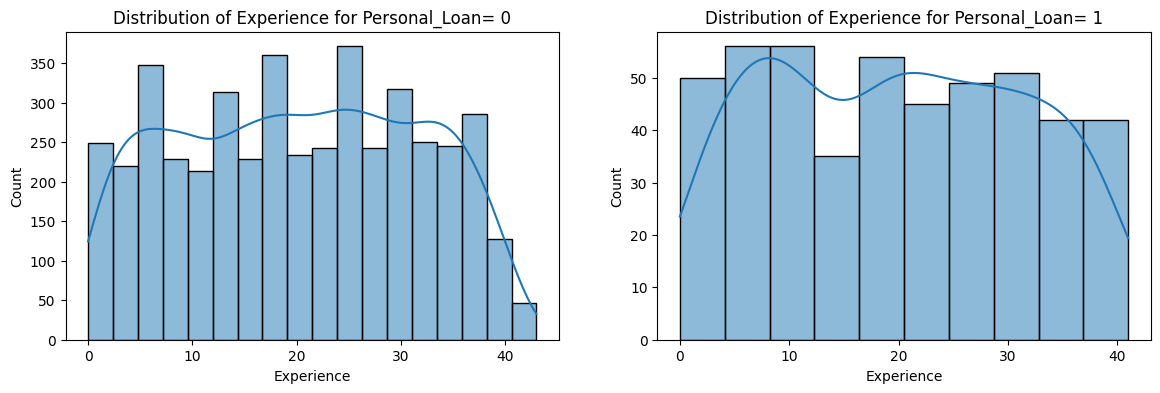

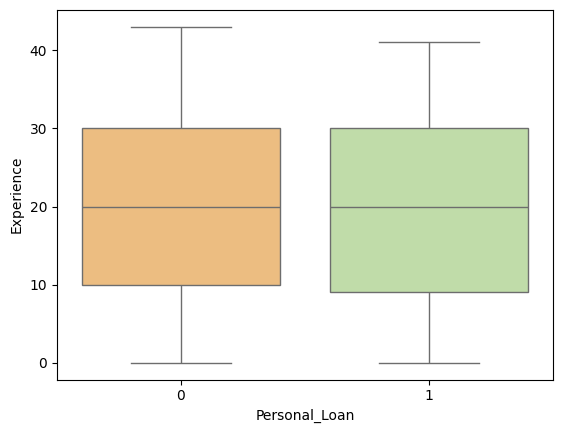

In [33]:
# Draw plots for experience with respect to personal loan
histplot_boxplot_wrt_target(data, 'Experience', 'Personal_Loan');

*   Distribution of customers not having personal loan is slightly right skewed
*   Distribution of customers having personal loan is almost even
*   Median experience of customers having personal loan and not having personal loan is almost same at about 20 years

#### Personal Loan Vs Income

Let's verify if income of a customer drives the ability to take personal loan

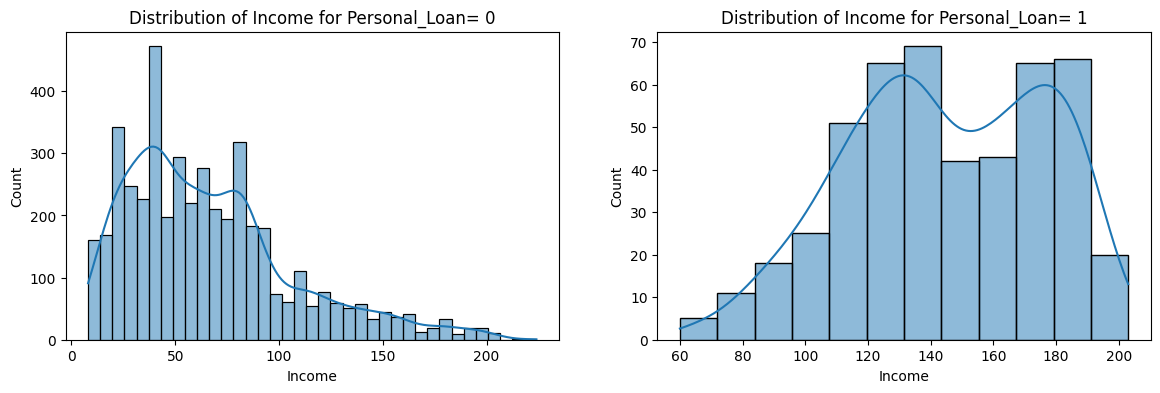

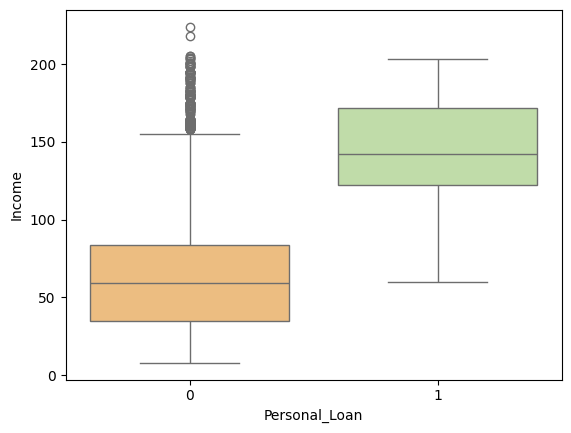

In [34]:
# Draw plots for income with respect to personal loan
histplot_boxplot_wrt_target(data, 'Income', 'Personal_Loan');

*   Distribution of income for customers not having personal loan is right skewed with many outliers above the upper quartile
*   Distribution of income for customers having personal loan is left skewed with no outliers
*   Customers having personal loan usually have higher income compared to customers not having personal loan

#### Personal Loan Vs Zip Code

Let's check if taking a personal loan depends on which region the customer lives in

Personal_Loan      0    1   All  No_Loan_Percent  Loan_Percent
ZIPCode_Prefix                                                
All             4520  480  5000         0.904000      0.096000
94              1334  138  1472         0.906250      0.093750
92               894   94   988         0.904858      0.095142
95               735   80   815         0.901840      0.098160
90               636   67   703         0.904694      0.095306
91               510   55   565         0.902655      0.097345
93               374   43   417         0.896882      0.103118
96                37    3    40         0.925000      0.075000


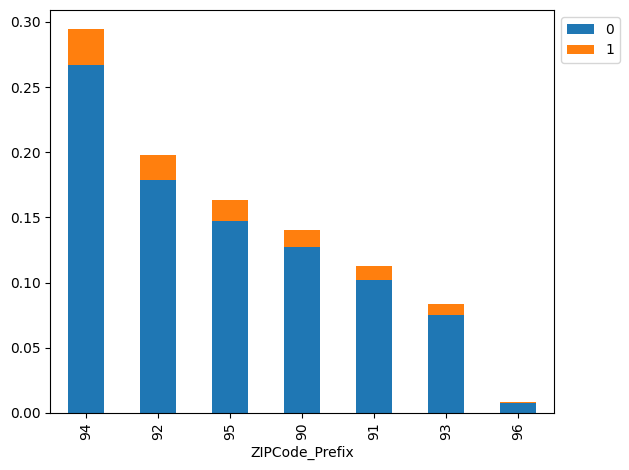

In [35]:
# Draw stacked bar plot for relationship between Zip Code and Personal Loan
stacked_barplot(data, 'ZIPCode_Prefix', 'Personal_Loan')

*   Zip codes starting with 96 have the least % of customers who have taken a personal loan
*   % of customers who have taken loan within other regions is varying between 9.6% to 10.3%
*   It appears that a customer located in zip code starting with 96 has less preference to take a personal loan compared to other zip codes



#### Personal Loan Vs Family


Let's see how does a family size matter to take a personal loan

Personal_Loan     0    1   All  No_Loan_Percent  Loan_Percent
Family                                                       
All            4520  480  5000         0.904000      0.096000
4              1088  134  1222         0.890344      0.109656
3               877  133  1010         0.868317      0.131683
1              1365  107  1472         0.927310      0.072690
2              1190  106  1296         0.918210      0.081790


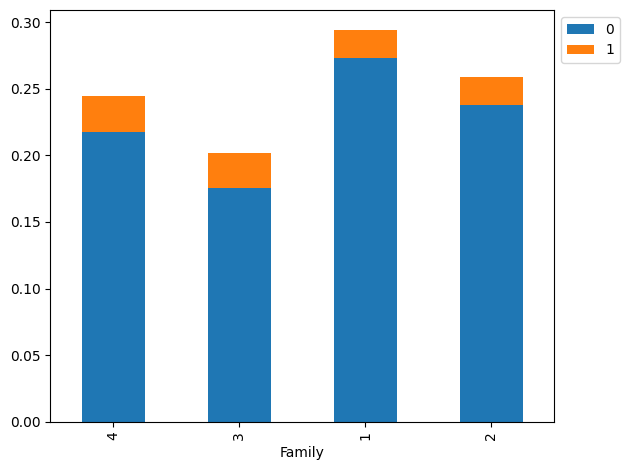

In [36]:
# Draw stacked bar plot for relationship between Family size and Personal Loan
stacked_barplot(data, 'Family', 'Personal_Loan')

*   Customers with family size of 3 and 4 have the highest number of personal loans
*   About 13% of the customers having family size of 3 have taken personal loan
*   Customers with family size of 1 and 2 have the lowest number of personal loans
*   About 7% of the customers having family size of 1 have taken personal loan
*   Customers with family size of 3 or more have a higher preference to take personal loan compared to customers with family size of 2 or less



#### Personal Loan Vs CCAvg

Let's see how does the average spending on credit card varies for customers having or not having personal loan

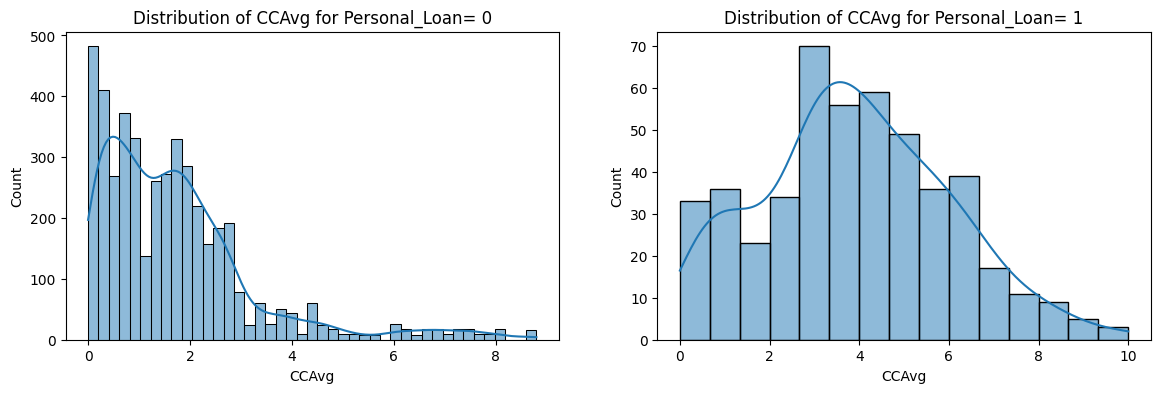

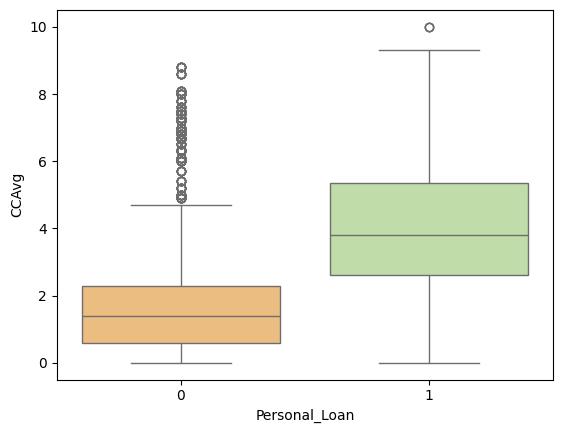

In [37]:
# Draw plots for CCAvg with respect to personal loan
histplot_boxplot_wrt_target(data, 'CCAvg', 'Personal_Loan');

*   Distribution of CCAvg for customers not having personal loan is right skewed with many outliers above the upper quartile
*   Distribution of income for customers having personal loan is right skewed with very few outliers
*   Customers having personal loan usually have higher average spending on credit cards compared to customers not having personal loan

#### Personal Loan Vs Education

Let's see if taking out a personal loan depends on the level of education

Personal_Loan     0    1   All  No_Loan_Percent  Loan_Percent
Education                                                    
All            4520  480  5000         0.904000      0.096000
3              1296  205  1501         0.863424      0.136576
2              1221  182  1403         0.870278      0.129722
1              2003   93  2096         0.955630      0.044370


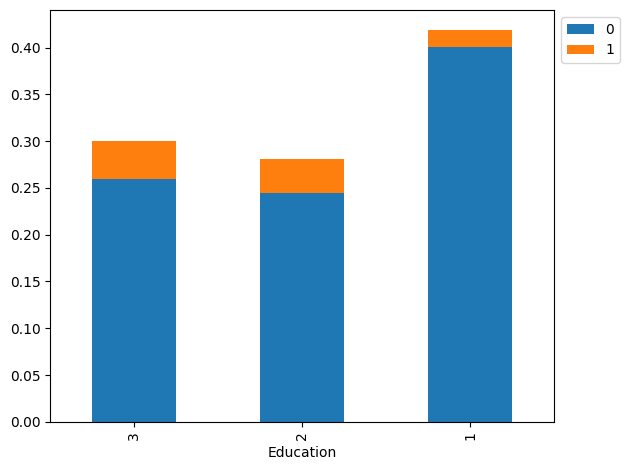

In [38]:
# Draw stacked bar plot for relationship between Education and Personal Loan
stacked_barplot(data, 'Education', 'Personal_Loan')

*   Customers with Advanced/Profession degree have take out more personal loans that customers with other levels of education
*   Undergraduate customers have the least number of personal loans
*   About 13.6% of customers having Advanced/Profession degree and about 13% of customers having Graduate degree have taken personal loan
*   Only 4.4% of the customers having undergraduate degree have taken personal loan
*   It appeas that customers having undergraduate degree have less preference to take personal loan compared to customers having a higher level of education



#### Personal Loan Vs Mortgage

Let's check how Mortgage value varies for customers having or not having personal loan

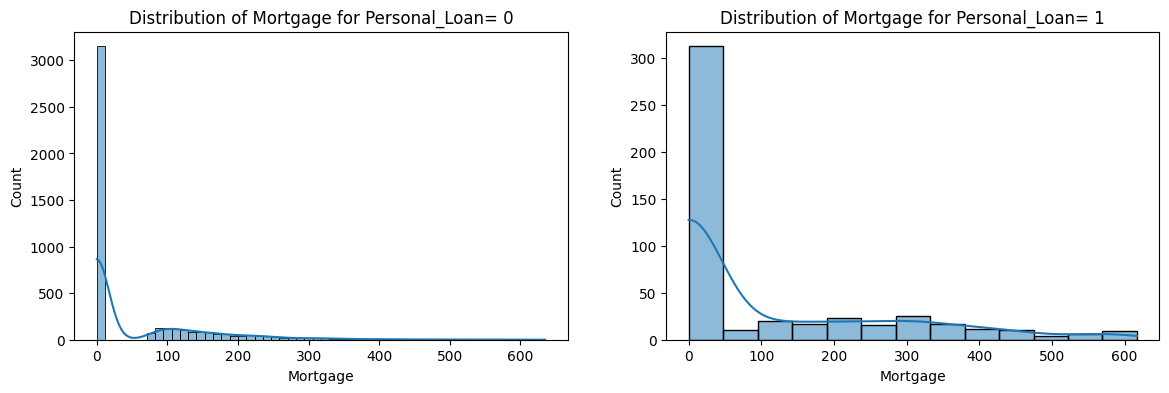

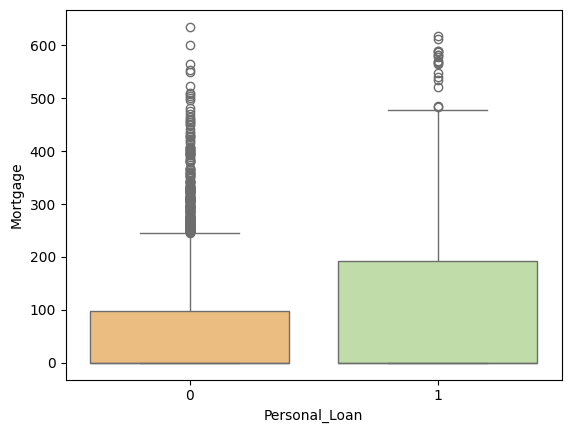

In [39]:
# Draw plots for mortgage with respect to personal loan
histplot_boxplot_wrt_target(data, 'Mortgage', 'Personal_Loan');

*   Distribution of mortgage for customers not having personal loan is right skewed with many outliers above the upper quartile
*   Distribution of income for customers having personal loan is right skewed with some outliers
*   Customers having personal loan usually have a higher mortgage value compared to customers not having personal loan

#### Personal Loan Vs Securities Account

Let's see if customers having securities account have also taken personal loan

Personal_Loan          0    1   All  No_Loan_Percent  Loan_Percent
Securities_Account                                                
All                 4520  480  5000         0.904000      0.096000
0                   4058  420  4478         0.906208      0.093792
1                    462   60   522         0.885057      0.114943


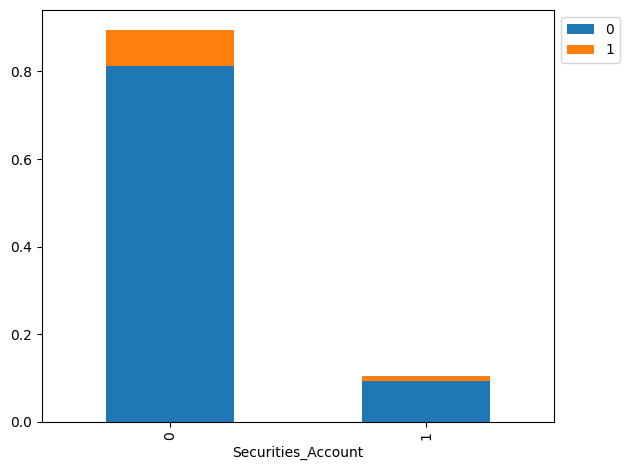

In [40]:
# Draw stacked bar plot for relationship between Securities account and Personal Loan
stacked_barplot(data, 'Securities_Account', 'Personal_Loan')

*   About 9.3% of customers having no securities account have personal loan
*   About 11.5% of the customer having securities account have personal loan
*   It appears that customers having securities account have a slightly higher chance of taking personal loan compared to customers not having securities account



#### Personal Loan Vs CD Account

Let's see if customers having CD account have also taken personal loan

Personal_Loan     0    1   All  No_Loan_Percent  Loan_Percent
CD_Account                                                   
All            4520  480  5000         0.904000      0.096000
0              4358  340  4698         0.927629      0.072371
1               162  140   302         0.536424      0.463576


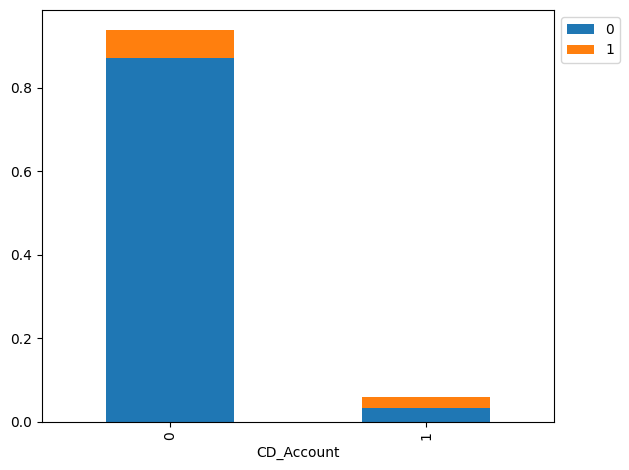

In [41]:
# Draw stacked bar plot for relationship between CD account and Personal Loan
stacked_barplot(data, 'CD_Account', 'Personal_Loan')

*   About 46% of the customers who have a CD account also have a personal loan
*   Only about 7% of customers who do not have a CD account have a personal loan
*   This indicates that there is a high chance a customer having CD account may accept a personal loan compared to a customer not having a CD account

#### Personal Loan Vs Online

Let's check if having an taking out a personal loan depends on whether the customer uses internet banking facilities

Personal_Loan     0    1   All  No_Loan_Percent  Loan_Percent
Online                                                       
All            4520  480  5000          0.90400       0.09600
1              2693  291  2984          0.90248       0.09752
0              1827  189  2016          0.90625       0.09375


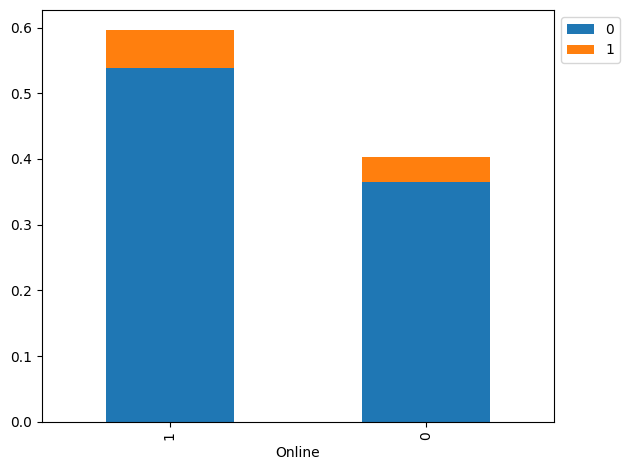

In [42]:
# Draw stacked bar plot for relationship between Online and Personal Loan
stacked_barplot(data, 'Online', 'Personal_Loan')

*   About 9.7% of the customers using internet banking facilities also have a personal loan
*   About 9.3% of the customers not using internet banking facilities have a personal loan
*   To avail a personal loan, it doesn't seem to matter if the customer is using internet banking facilities or not



#### Personal Loan Vs Credit Card

Let's check if having an taking out a personal loan depends on whether the customer uses credit card issued by another bank

Personal_Loan     0    1   All  No_Loan_Percent  Loan_Percent
CreditCard                                                   
All            4520  480  5000         0.904000      0.096000
0              3193  337  3530         0.904533      0.095467
1              1327  143  1470         0.902721      0.097279


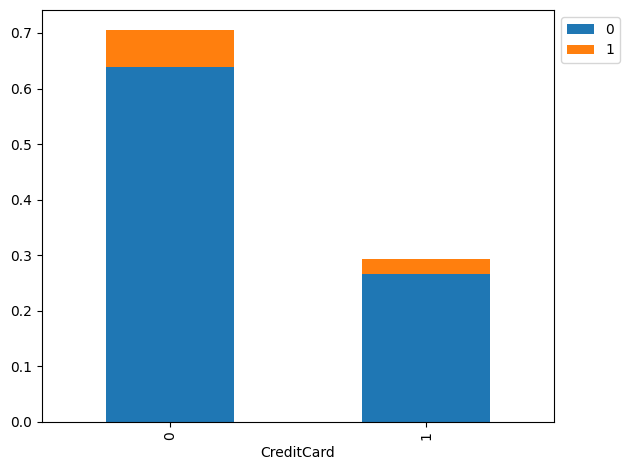

In [43]:
# Draw stacked bar plot for relationship between Credit Card and Personal Loan
stacked_barplot(data, 'CreditCard', 'Personal_Loan')

*   About 9.5% of the customers not using credit card issued by another bank have a personal loan
*   About 9.7% of the customers using credit card issued by another bank have a personal loan
*   To avail a personal loan, it doesn't seem to matter if the customer is using credit card issued by another bank



#### Heatmap

Let's check the heatmap to see the correlation between the variables

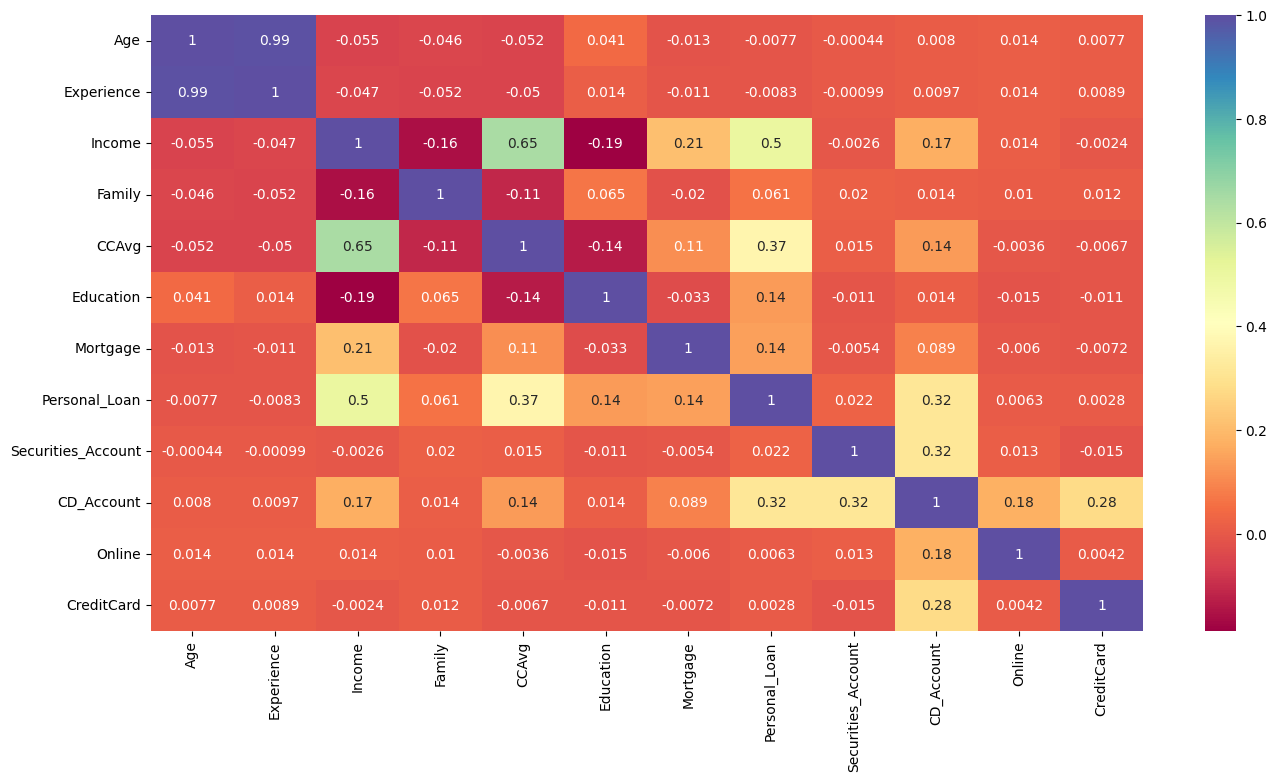

In [44]:
# Select the columns with numeric data types from the data set
cols_list = data.select_dtypes(include=np.number).columns.tolist()

# Drop the target column from the column list
#cols_list.remove('Personal_Loan')

# Draw a heatmap for the numeric columns
plt.figure(figsize=(16, 8))
sns.heatmap(data[cols_list].corr(), annot=True, cmap="Spectral");


*   Age and Experience have a very strong positive correlation of almost 1
*   Personal Loan has a fairly positive correlation with Income, and has some amount of positive correlation with CCAvg and CD_Account
*   Income and CCAvg have a fairly positive correlation
*   There is some amount of positive correlation between CD_Account and Securities_Account, CreditCard and CD_Account, Mortgage and Income
*   Correlation between other columns is negligible

### EDA Outcome
*   Income is right skewed with quite a few customers earning more than 180K
*   Average credit card spending is also right skewed with quite a few customers spending more than 5K per month
*   Mortgage is heavily right skewed with customers having mortgage of more than 250K
*   Single customers form the highest percentage of the customer base at about 29%
*   Undergrad customers form the highest percentage of the customer base at about 42%
*   Only about 9.5% of the customers have a personal loan
*   About 29% of the customers have a credit card with another bank
*   Customers with family size of 3 or 4 have more personal loans compared to customers with family size of 1 or 2
*   Customer's interest in purchasing a loan seems to increase with the increase in level of education, with customers having Advanced/Profession degree buying the most number of personal loans
*   Customer's interest in purchasing a loan doesn't seem to depend too much on the age with average and median age of customers having or not having loan is almost same at about 45 years
*   Customer's interest in purchasing loan appears to increase as the Income, Average spending on credit card goes up.
*   Customers with a CD Account also appear to have an interest in purchasing a personal loan with about 46% of the customers with a CD Account also having a personal loan

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

#### Missing value treatment

As noted in Data Overview, there are no null values in any columns.
Also, there are no 0 values in any columns like Age, Experience, Family, ZIPCode, Education that need any treatment

So no treatment is neede for missing values

#### Feature engineering

Feature engineering has been already performed on the ZIPCode column during EDA phase

#### Outlier detection and treatment

In [45]:
# Identify lower and upper quantiles for the continuous columns
Q1 = data[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']].quantile(.25)
Q3 = data[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']].quantile(.75)

# Calculate the IQR
IQR = Q3-Q1

# Identify the lower bound and upper bound to check for outliers
lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)

# Calculate the outlier percentages for each continuous columns
((data[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']] < lower_bound) | (data[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']] > upper_bound)).sum()/len(data)*100

Age           0.00
Experience    0.00
Income        1.92
CCAvg         6.48
Mortgage      5.82
dtype: float64

*   There are no outliers for Age and Experience
*   Income has outliers in 1.92% of the records
*   CCAvg has outliers in 6.48% of the records
*   Mortgage has outliers in 5.82% of the records
*   Decision Trees are less prone to outliers and hence no outlier treatment will be performed

#### Preparing data for modeling

In [46]:
# As Age and Experience as almost perfectly correlated, let's drop Experience column as if won't add any additional information to the model
# Also drop the ZIPCode column as we have added a ZIPCode_prefix column
# Create prediction dataset and target data set
x = data.drop(['Experience', 'Personal_Loan', 'ZIPCode'], axis=1)
y = data['Personal_Loan']
x = pd.get_dummies(x, columns=["ZIPCode_Prefix", "Education"], drop_first=True)
#x = pd.get_dummies(x, columns=["ZIPCode_Prefix"], drop_first=True)
x = x.astype(float)
# Split the dataset in training and test datasets with a split of 70:30 %
# Use stratify=Y for ensure that we have same proporation of the classes in training and test datasets as the original data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42, stratify=y)

In [47]:
# Check number of records in training and test datasets
print('Shape of training dataset:', x_train.shape)
print('Shape of test dataset:', x_test.shape)

print()
# Check the distribution of personal loan in training and test datasets

print('% of classes in training dataset\n:', y_train.value_counts(normalize=True))
print()
print('% of classes in test dataset\n:', y_test.value_counts(normalize=True))

Shape of training dataset: (3500, 17)
Shape of test dataset: (1500, 17)

% of classes in training dataset
: 0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

% of classes in test dataset
: 0    0.904
1    0.096
Name: Personal_Loan, dtype: float64


## Model Building

### Model Evaluation Criterion

**A model can make wrong predictions in the following ways:**
- Predicting a customer will purchase a personal loan, but in reality the customer did not pruchase a loan (False Positive: Predicted - 1, Actual - 0)
- Predicting a customer will not purchase a personal loan, but in reality the customer pruchased a loan (False Negative: Predicted - 0, Actual - 1)

**What is important to the bank?**
- Bank wants to identify the potential customers who have a higher probability of purchasing the loan, and also increase the success ratio
- If we predict that a customer will not purchase a loan, but if the customer is actually eligible to purchase a loan and if the customer is interested, the bank will lose income on interest
- If we predict that a customer will purchase a loan, but if the customer is not eligible to purchase a loan or if the customer is not interested, there are few things that could happen:
  - Marketing cost may increase due to likely spending of time, money on advertising, etc to convert customers who have no interest in purchasing or are not eligible to purchase due to bad credit score or bad payment history
  - May create negative customer experience due to frequently reaching out to uninterested customers. Customers may even opt out of the marketing communications due to this.
  - A high false positive rate can possibly dilute the overall success rate of the marketing campaign, eventually reduce the campaign effectiveness
  - Due to aggresive promotions, if an ineligible customer ends up purchasing a loan and end up defaulting, bank may actually risk losing money through defaulters

**How to identify as many potential customers as possible while avoiding negative customer experience or possible losses**
- The bank would want to identify as many customers as possible who may be intersted in puchasing a loan, while also wanting to reduce the risk of losing money or creating a negative customer experience. In other words, the bank may want to keep the False Positives and False Negatives in balance.
- If there are too many False Positives or too many False Negatives, the success ratio for the campaign may reduce
- To achieve this, F1 should be maximized so that both False Positives and False Negatives are kept in check




**Declare functions to evaluate model performance and visualize the decision trees**

In [48]:
# Function to calculate the performance scores for the model
def evaluate_model_performance(model, predictors, target):
    target_pred = model.predict(predictors) # Predict the output based on the predictors using the provided model

    f1 = f1_score(target, target_pred)  # Get F1 score
    accuracy = accuracy_score(target, target_pred)  # Get accuracy score
    recall = recall_score(target, target_pred)  # Get Recall score
    precision = precision_score(target, target_pred)    # Get precision score

    # Save all the scores in a dataframe and return the dataframe
    score = pd.DataFrame({"Accracy": accuracy, "Recall": recall, "Precision": precision, "F1": f1}, index=[0])
    return score

In [49]:
# Function to show the confusion matrix for a given model using predictors and target values
def show_confusion_matrix(model, predictors, target):
    target_pred = model.predict(predictors) # Predict the output based on the predictors using the provided model
    cm = confusion_matrix(target, target_pred)  # Create confusion matrix using the actual target values and predicted target values

    # Generate labels to be displayed in the confusion matrix. Label should have count and % of the values in each cell of the matrix
    labels = np.asarray([str(i) + ("\n{:.2%}".format(i/cm.flatten().sum())) for i in cm.flatten()]).reshape(2,2)

    # Use heatmap to show the confusion matrix, and give appropriate labels to the axes
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="", cbar=False)

    plt.xlabel('Predicted outcome')
    plt.ylabel('True outcome')

In [50]:
# Code to plot the decision tree

features = list(x_train.columns)    # Get column names for the independent variables from the training set

# Function to display the tree. This function will be called from multiple places to display the decision tree during model building and pruning
def display_tree(model, fig_size=(10,6)):
    plt.figure(figsize=fig_size) # Set figure size

    # Plot the tree based on the given model and features used in the model
    model_tree = tree.plot_tree(model, feature_names = features, fontsize=9, filled=True, node_ids=False, class_names=None)


In [51]:
# Function to plot the features along with their importance values
def show_feature_importance(model):
    # Create a dataframe for the importance values of the features in the provided model. Sort the dataframe by the importance values in a decreasing order
    feature_importances = pd.DataFrame(model.feature_importances_, columns=['Importance'], index=features).sort_values(by='Importance', ascending=False)
    feature_importances.reset_index(names='Feature', inplace=True)

    # Create a barplot to show the feature importances
    sns.barplot(feature_importances, x='Importance', y='Feature')


In [52]:
# Function to show a text report of the rules of the decision tree for the provided model
def show_rules_in_tree(model):
    print(tree.export_text(model, feature_names=features, show_weights=True))

### Model Building

The dataset is imbalanced with about 90.4% of the customers without any personal loan, and about 10.6% of the customers with personal loan
A class weight ideally has to be assigned to that the tree is not biased towards the dominant class.

In [53]:
#class_weight=None
#class_weight='balanced'
#class_weight={0: 0.45, 1: 0.55}
class_weight={0: 0.55, 1: 0.45}

Multiple class_weights were tried across default, pre-pruned and post-pruned models, and the best class_weight of {0: 0.55, 1: 0.45} has been selected above.
Although it is typically unusual to give a higher class weight to the majority class, the given class weight is actually giving the best performance across all the models

A comparison of the model performance for all the other class weights mentioned above has been provided in the <a href = #link1>appendix section</a> at the end of this notebook

#### Decision Tree using sklearn

In [54]:
# Create a decision tree using random_state=42 and class_weight=balanced as the dataset is imbalanced with ratio of about 10:90 for values in personal_loan
model = DecisionTreeClassifier(random_state=42, class_weight=class_weight)

# Fit the model using the training dataset
model.fit(x_train, y_train)


DecisionTreeClassifier(class_weight={0: 0.55, 1: 0.45}, random_state=42)

#### Model performance on training data

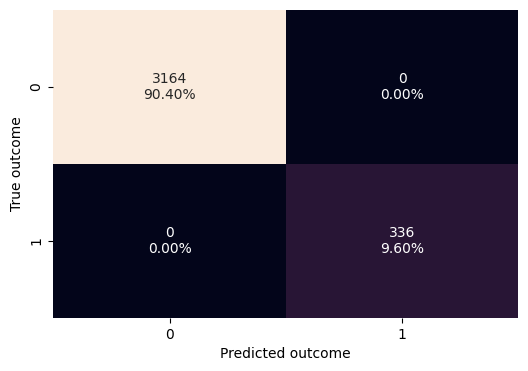

In [55]:
# Plot the confusion matrix for the default model using the training data
show_confusion_matrix(model, x_train, y_train)

In [56]:
# Get the performance scores for the default model using the training data
default_model_train_performance = evaluate_model_performance(model, x_train, y_train)
default_model_train_performance

Accracy  Recall  Precision   F1
0      1.0     1.0        1.0  1.0

#### Visualize the Decision Tree

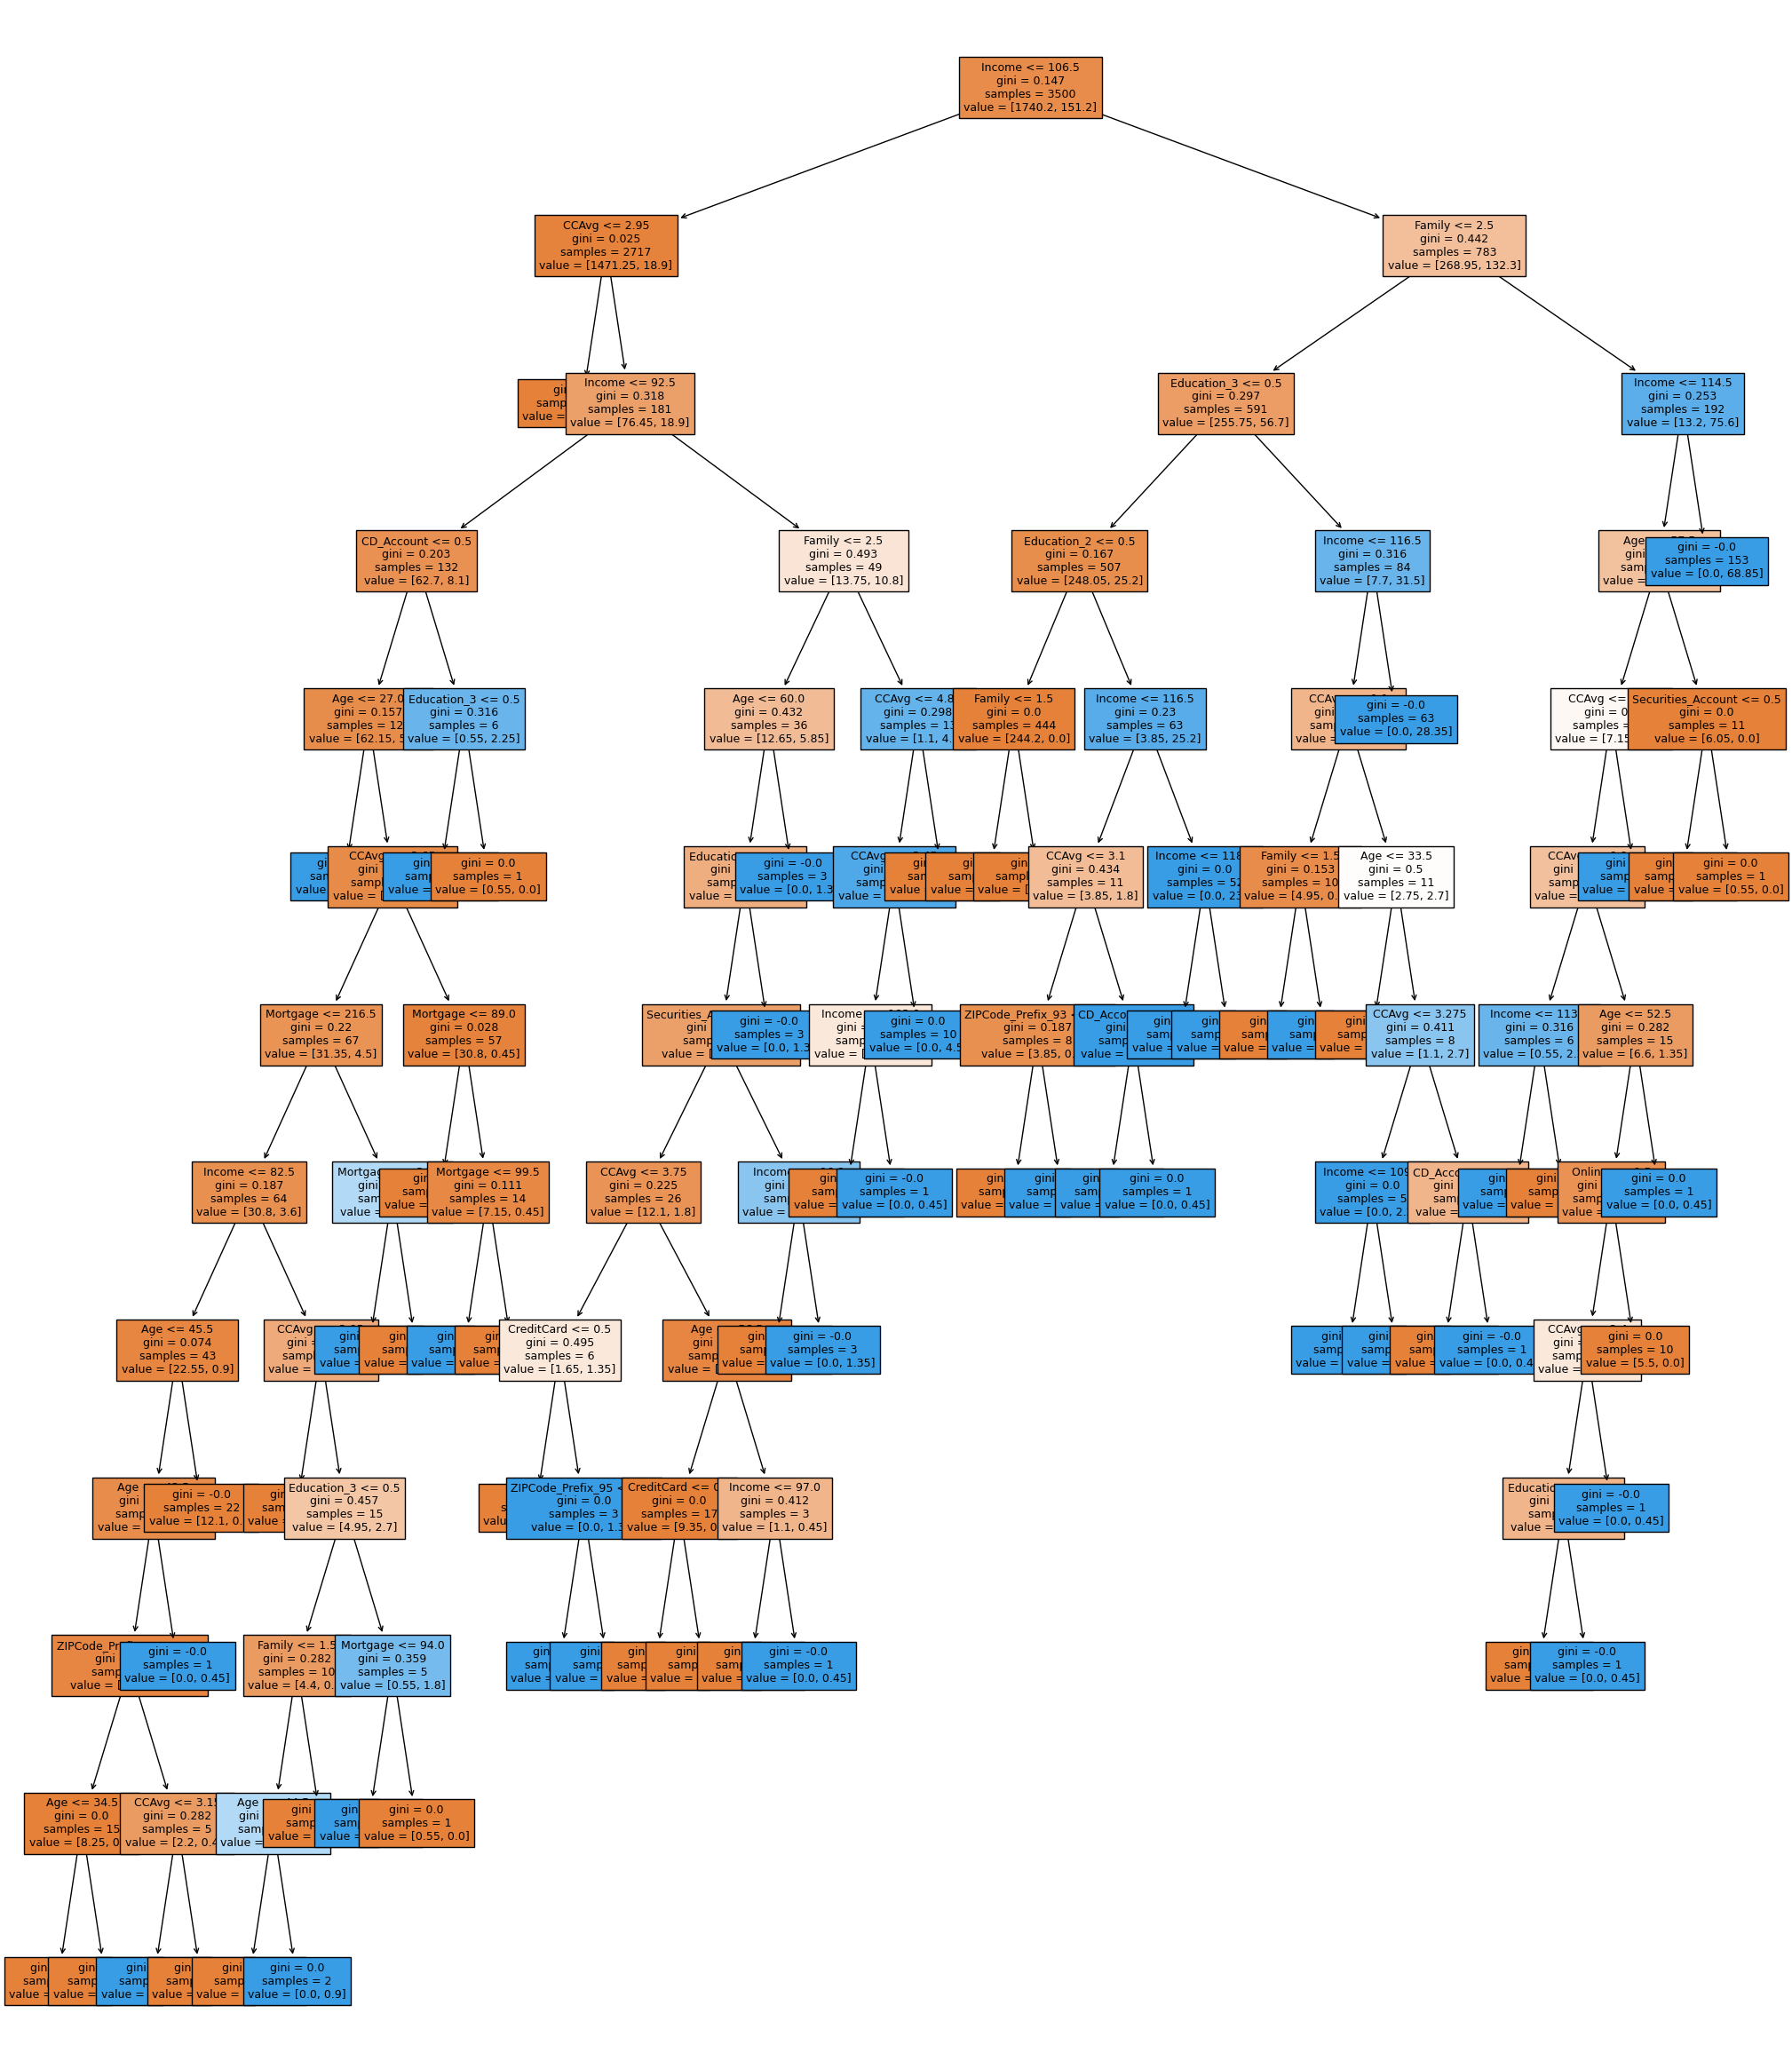

In [57]:
# Display the decision tree for the default model
display_tree(model, (25, 30))

In [58]:
# Get the depth of the model
model.get_depth()

12

* The depth of the default tree is 12

In [59]:
# Print the rules in the decision tree
show_rules_in_tree(model)

|--- Income <= 106.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1394.80, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 27.00
|   |   |   |   |   |--- weights: [0.00, 0.90] class: 1
|   |   |   |   |--- Age >  27.00
|   |   |   |   |   |--- CCAvg <= 3.65
|   |   |   |   |   |   |--- Mortgage <= 216.50
|   |   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |   |--- Age <= 45.50
|   |   |   |   |   |   |   |   |   |--- Age <= 43.50
|   |   |   |   |   |   |   |   |   |   |--- ZIPCode_Prefix_94 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- ZIPCode_Prefix_94 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- Age >  43.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.45] class: 1
|   |   |   |   |   |   |   | 

Using the above decision rules, we can interpret the decision tree model like:
* If the income is less than or equal to 106.5K and average credit card usage per month less than or equal to 2.95K, then the customer is most likely not going to have a personal loan

Other interpretations can be made similarly from the other decision rules in the tree

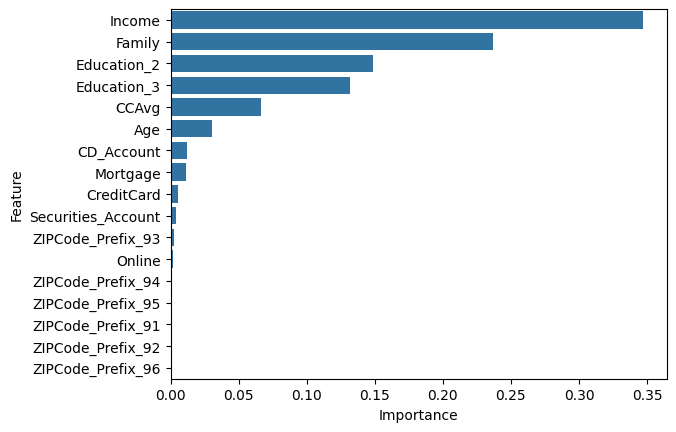

In [60]:
# Plot the feature importances
show_feature_importance(model)

* Annual income and family size are the 2 most important features in the default decision tree.
* Level of education is also an important feature with Graduate and Advanced/Professional degree playing an important role
* Average spending on credit card per month and Age of the customers also have some role to play
* Having a CD account, mortgage value also have some importance, but do not seems to play a huge role

#### Model performance on test data

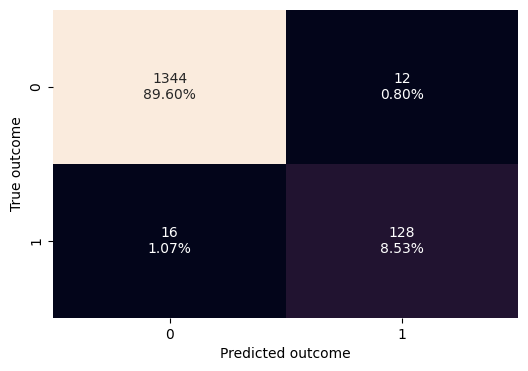

In [61]:
# Plot the confusion matrix for the default model using the test data
show_confusion_matrix(model, x_test, y_test)

In [62]:
# Get the performance scores for the default model using the test data
default_model_test_performance = evaluate_model_performance(model, x_test, y_test)
default_model_test_performance

Accracy    Recall  Precision        F1
0  0.981333  0.888889   0.914286  0.901408

##### Observations on performance

In [63]:
# Check the difference in the performance measures
default_model_train_performance - default_model_test_performance

Accracy    Recall  Precision        F1
0  0.018667  0.111111   0.085714  0.098592

* All the performance scores for the training data are 1
* Recall, Precision and F1 scores are considerably low for the test data compared to the training data, indicating that the model is overfitting

## Model Performance Improvement

**Let's implement pre-pruning and post-pruning methods to reduce overfitting**

### Pre-pruning

#### **Pre-pruning with manual iteration**

Let's identify the best pre-pruned model by defining a set of hyperparameters and manually iteration through their combinations

##### Identifying best pre-pruned model

In [64]:
# Define the hyperparameters of the tree to iterate over
max_depth_values = [4, 5, 6, 7, 8, 9, 10]
max_leaf_nodes_values = [25, 50, 75, 100, 150, 200, 250]
min_samples_split_values = [5, 10, 20, 30, 40, 50]

# Initialize the variables to store the best pre-pruned model and the performance score
best_pre_prune_model_manual_itr = None
best_test_score = 0.0

# Iterate through all the combinations of the specified hyperparameter values
for depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the trees with the current values of the hyperparameters
            estimator = DecisionTreeClassifier(max_depth=depth, max_leaf_nodes=max_leaf_nodes, min_samples_split=min_samples_split, random_state=42, class_weight=class_weight)

            # Fit the initialized model with the training data
            estimator.fit(x_train, y_train)

            # Perform predictions on training and test datasets
            y_train_pred = estimator.predict(x_train)
            y_test_pred = estimator.predict(x_test)

            # Calculate F1 scores of the training and test data sets
            train_f1_score = f1_score(y_train, y_train_pred)
            test_f1_score = f1_score(y_test, y_test_pred)

            # Update the best model and best test score if the score for the current model is higher than the best test score calculated until the previous iteration
            if (train_f1_score > best_test_score):
                best_test_score = test_f1_score
                best_pre_prune_model_manual_itr = estimator

# Print the best parameters found after the iterations
print("Best parameters found:")
print(f"Max depth: {best_pre_prune_model_manual_itr.max_depth}")
print(f"Max leaf nodes: {best_pre_prune_model_manual_itr.max_leaf_nodes}")
print(f"Min samples split: {best_pre_prune_model_manual_itr.min_samples_split}")
print(f"Best test F1 score: {best_test_score}")


Best parameters found:
Max depth: 10
Max leaf nodes: 250
Min samples split: 20
Best test F1 score: 0.9357142857142857


##### Model performance on training data

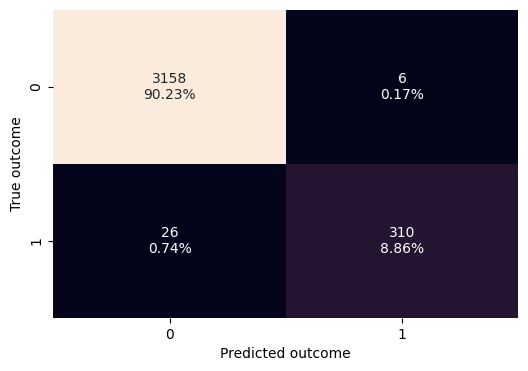

In [65]:
# For the training data, plot the confusion matrix for the best pre pruned model found through manual interations
show_confusion_matrix(best_pre_prune_model_manual_itr, x_train, y_train)

In [66]:
# For the training data, get the performance scores for the best pre pruned model found through manual interations
pre_prune_model_manual_itr_perf_train = evaluate_model_performance(best_pre_prune_model_manual_itr, x_train, y_train)
pre_prune_model_manual_itr_perf_train

Accracy    Recall  Precision       F1
0  0.990857  0.922619   0.981013  0.95092

##### Visualizing the Decision Tree

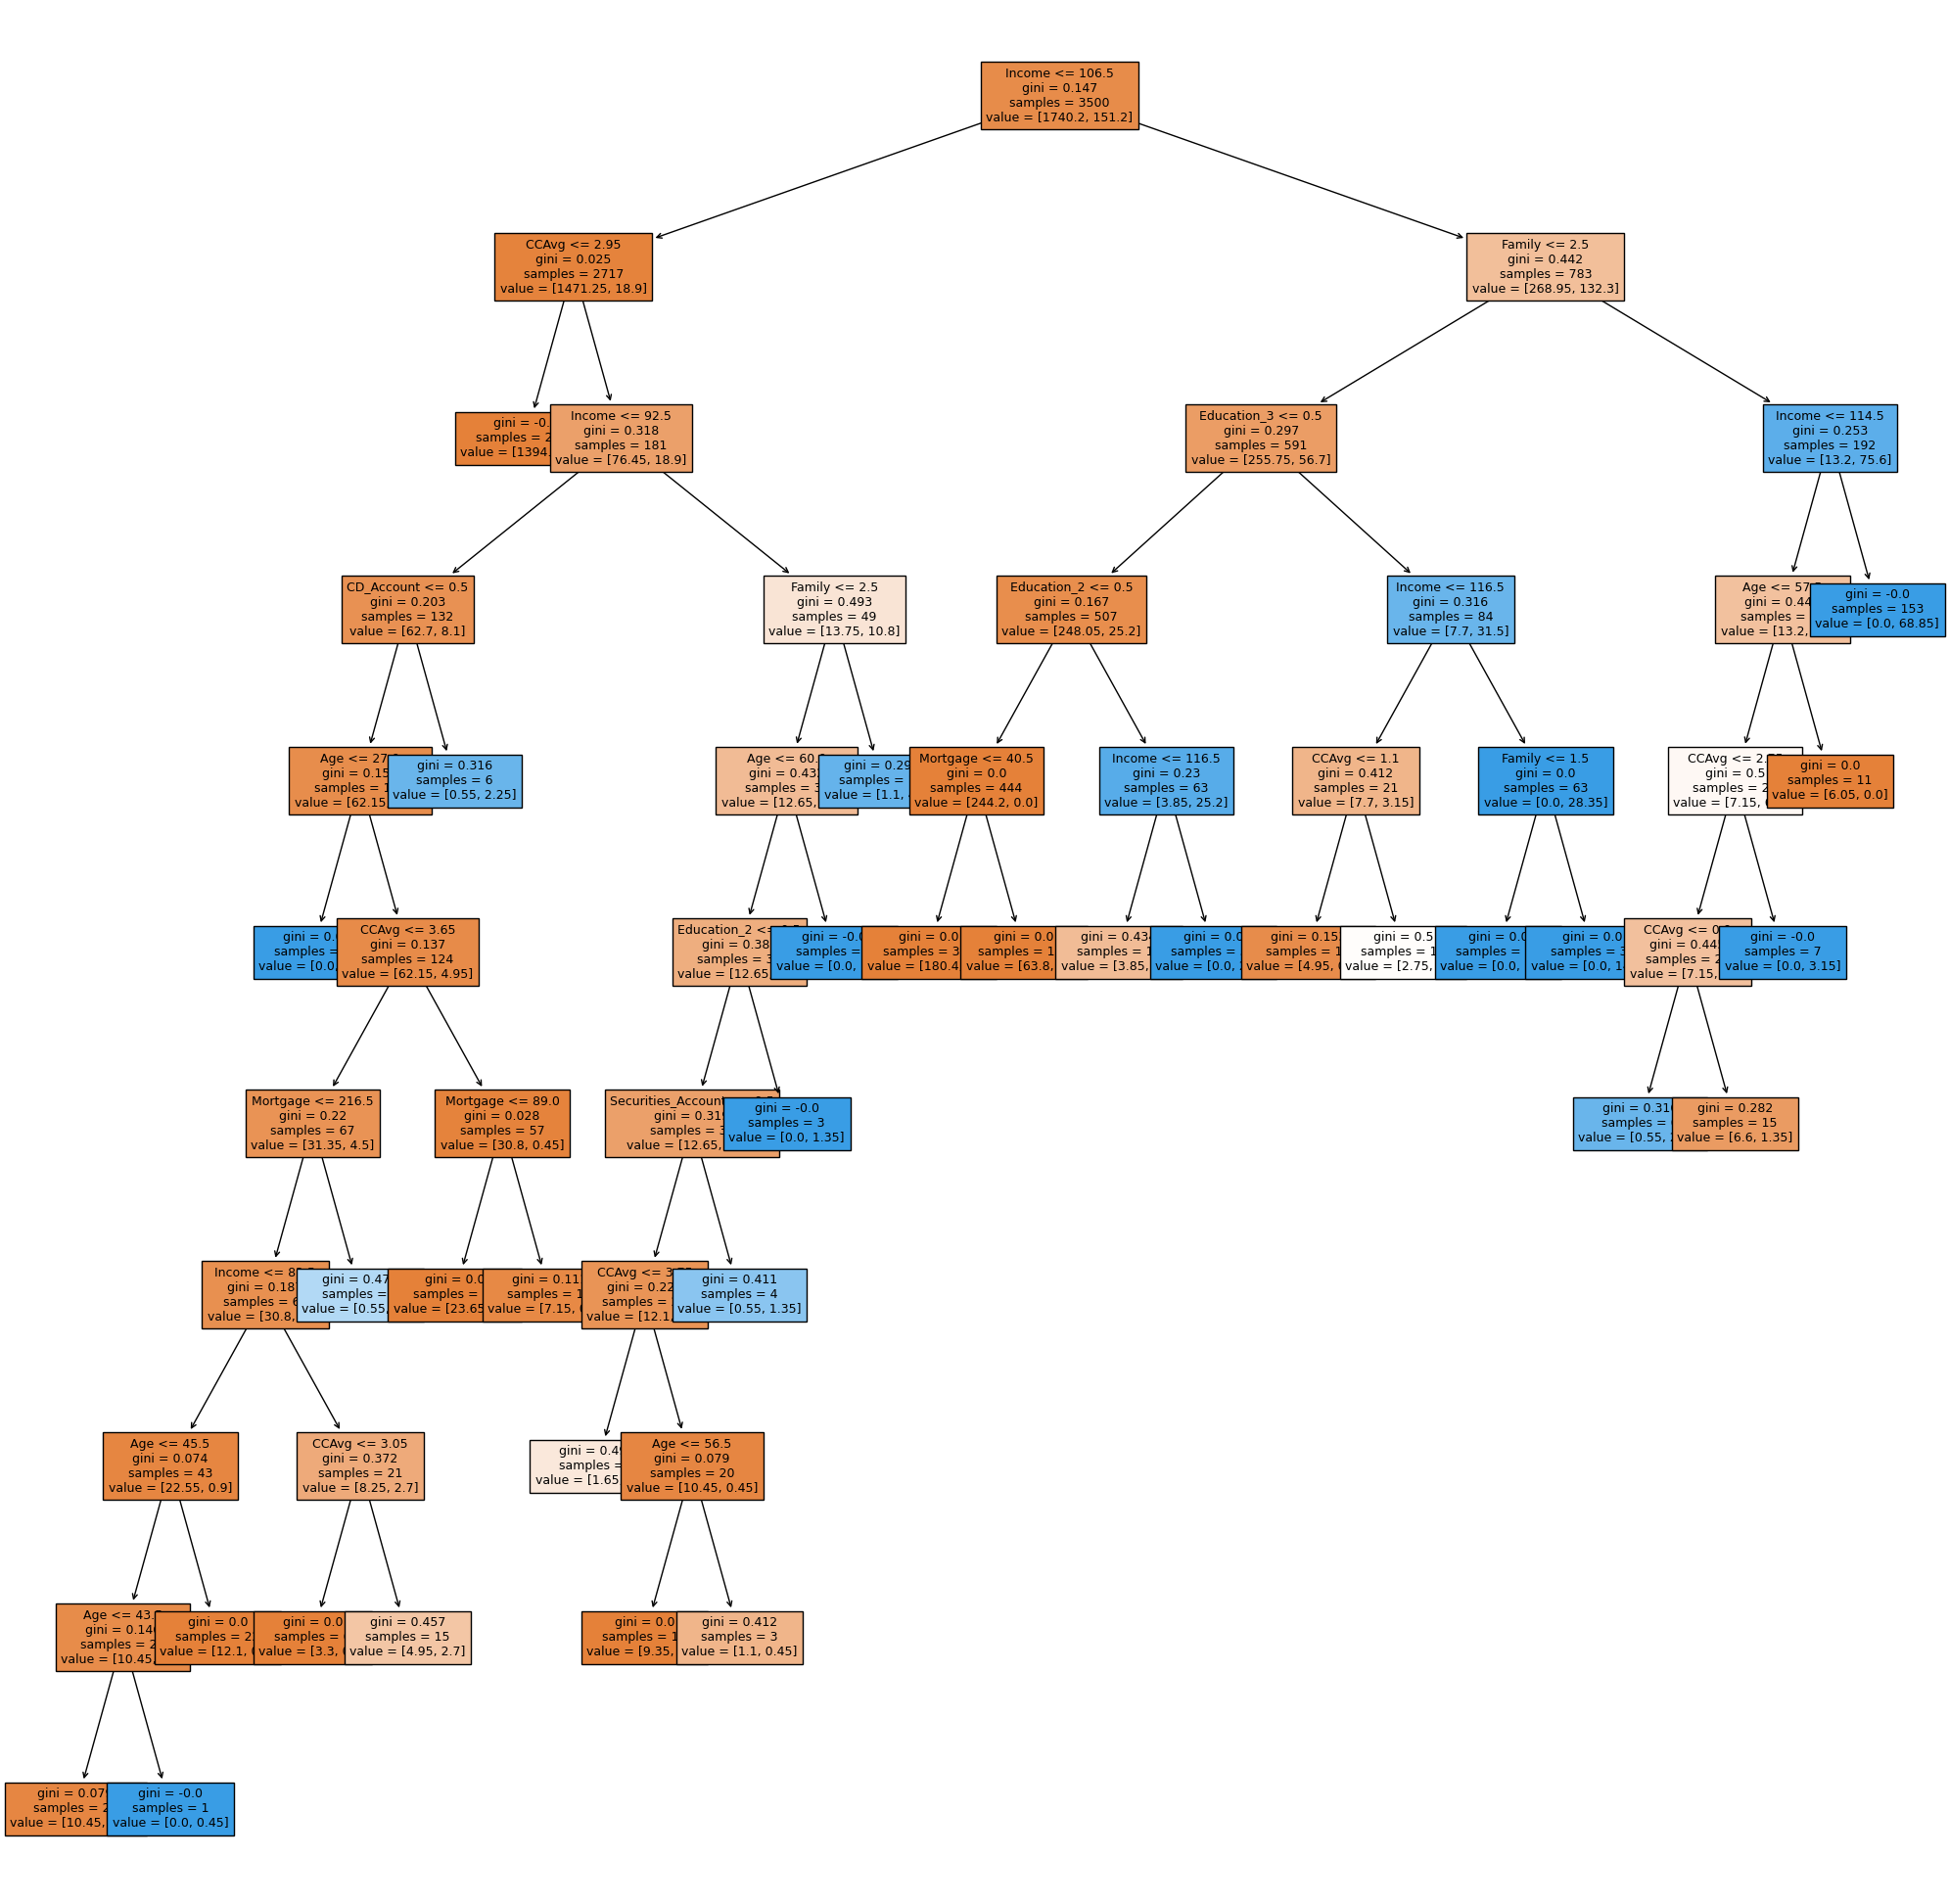

In [67]:
# Display the decision tree for the best pre-pruned model identified using manual iteration
display_tree(best_pre_prune_model_manual_itr, (25, 25))

In [68]:
# Get the depth of the model
best_pre_prune_model_manual_itr.get_depth()

10

* Depth of the tree is 10

In [69]:
# Print the rules in the decision tree
show_rules_in_tree(best_pre_prune_model_manual_itr)

|--- Income <= 106.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1394.80, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 27.00
|   |   |   |   |   |--- weights: [0.00, 0.90] class: 1
|   |   |   |   |--- Age >  27.00
|   |   |   |   |   |--- CCAvg <= 3.65
|   |   |   |   |   |   |--- Mortgage <= 216.50
|   |   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |   |--- Age <= 45.50
|   |   |   |   |   |   |   |   |   |--- Age <= 43.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [10.45, 0.45] class: 0
|   |   |   |   |   |   |   |   |   |--- Age >  43.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.45] class: 1
|   |   |   |   |   |   |   |   |--- Age >  45.50
|   |   |   |   |   |   |   |   |   |--- weights: [12.10, 0.00] class: 0
|   |   |   |   |   |   |   |--- Income >  82.50
|   |   |   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   | 

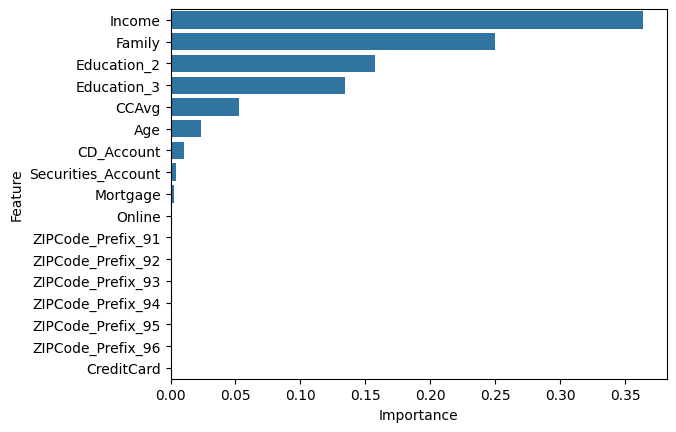

In [70]:
# Plot the feature importances
show_feature_importance(best_pre_prune_model_manual_itr)

* Annual income and family size are the 2 most important features in the default decision tree.
* Level of education is also an important feature with Graduate and Advanced/Professional degree playing an important role
* Average spending on credit card per month and Age of the customers also have some role to play
* Having a CD account has some importance, but doesn't seem to play a huge role


##### Model performance on test data

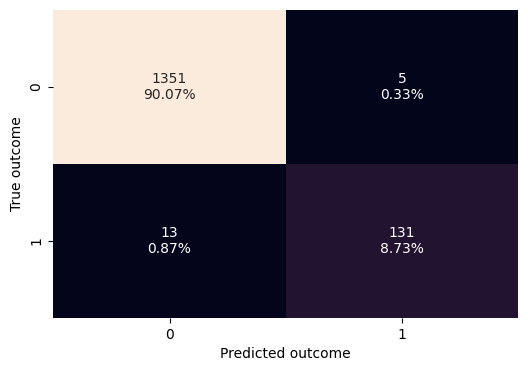

In [71]:
# For the test data, plot the confusion matrix for the best pre pruned model found through manual interations
show_confusion_matrix(best_pre_prune_model_manual_itr, x_test, y_test)

In [72]:
# For the test data, get the performance scores for the best pre pruned model found through manual interations
pre_prune_model_manual_itr_perf_test = evaluate_model_performance(best_pre_prune_model_manual_itr, x_test, y_test)
pre_prune_model_manual_itr_perf_test

Accracy    Recall  Precision        F1
0    0.988  0.909722   0.963235  0.935714

##### Observations on performance

In [73]:
# Check the difference in the performance measures
pre_prune_model_manual_itr_perf_train - pre_prune_model_manual_itr_perf_test

Accracy    Recall  Precision        F1
0  0.002857  0.012897   0.017777  0.015206

* Difference between the Recall, Precision and F1 scores of the model for training and test data sets is less at about 1.28%, 1.77% and 1.52% respectively
* This means that the model has been able to fairly generalize the result

#### **Pre-pruning with GridSearchCV**

Instead of using the manual iteration method, let's use an automated method to identify the best hyperparameters to create the best pre-pruned model using GridSearchCV

##### Identifying best pre-pruned model with GridSearchCV

In [74]:
# Define the parameter grid to identify the best model using GridSearchCV
parameter_grid = {'max_depth': [4,5,6,7,8,9,10], 'max_leaf_nodes': [25, 50, 75, 100, 150, 200, 250]}

# Initialize the model, using the class_weight define earlier
cv_model = DecisionTreeClassifier(random_state=42, class_weight=class_weight)

# Initialize the GridSearchCV object while using F1 as the scoring method
# Use cv=5 to split the training data into 5 parts, and train and evaluate the model 5 times by using each part as validation set once each time
grid_search = GridSearchCV(cv_model, param_grid = parameter_grid, scoring='f1', cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight={0: 0.55, 1: 0.45},
                                              random_state=42),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [25, 50, 75, 100, 150, 200, 250]},
             scoring='f1')

In [75]:
# Print some attributes for the best models
print("Best score:", grid_search.best_score_)
print("Best params:", grid_search.best_params_)
print("Best estimator:", grid_search.best_estimator_)
print("")

# Get the best estimator from the results of GridSearchCV, and fir the training data on the best estimator
best_pre_prune_model_cv = grid_search.best_estimator_
best_pre_prune_model_cv.fit(x_train, y_train)

Best score: 0.9049008809015447
Best params: {'max_depth': 9, 'max_leaf_nodes': 25}
Best estimator: DecisionTreeClassifier(class_weight={0: 0.55, 1: 0.45}, max_depth=9,
                       max_leaf_nodes=25, random_state=42)



DecisionTreeClassifier(class_weight={0: 0.55, 1: 0.45}, max_depth=9,
                       max_leaf_nodes=25, random_state=42)

##### Model performance on training data

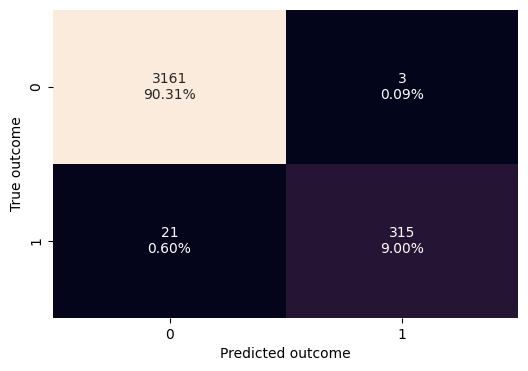

In [76]:
# For the training data, plot the confusion matrix for the best pre pruned model found through GridSearchCV
show_confusion_matrix(best_pre_prune_model_cv, x_train, y_train)

In [77]:
# For the training data, get the performance scores for the best pre pruned model found through GridSearchCV
pre_prune_model_cv_perf_train = evaluate_model_performance(best_pre_prune_model_cv, x_train, y_train)
pre_prune_model_cv_perf_train

Accracy  Recall  Precision        F1
0  0.993143  0.9375   0.990566  0.963303

##### Visualizing the Decision Tree

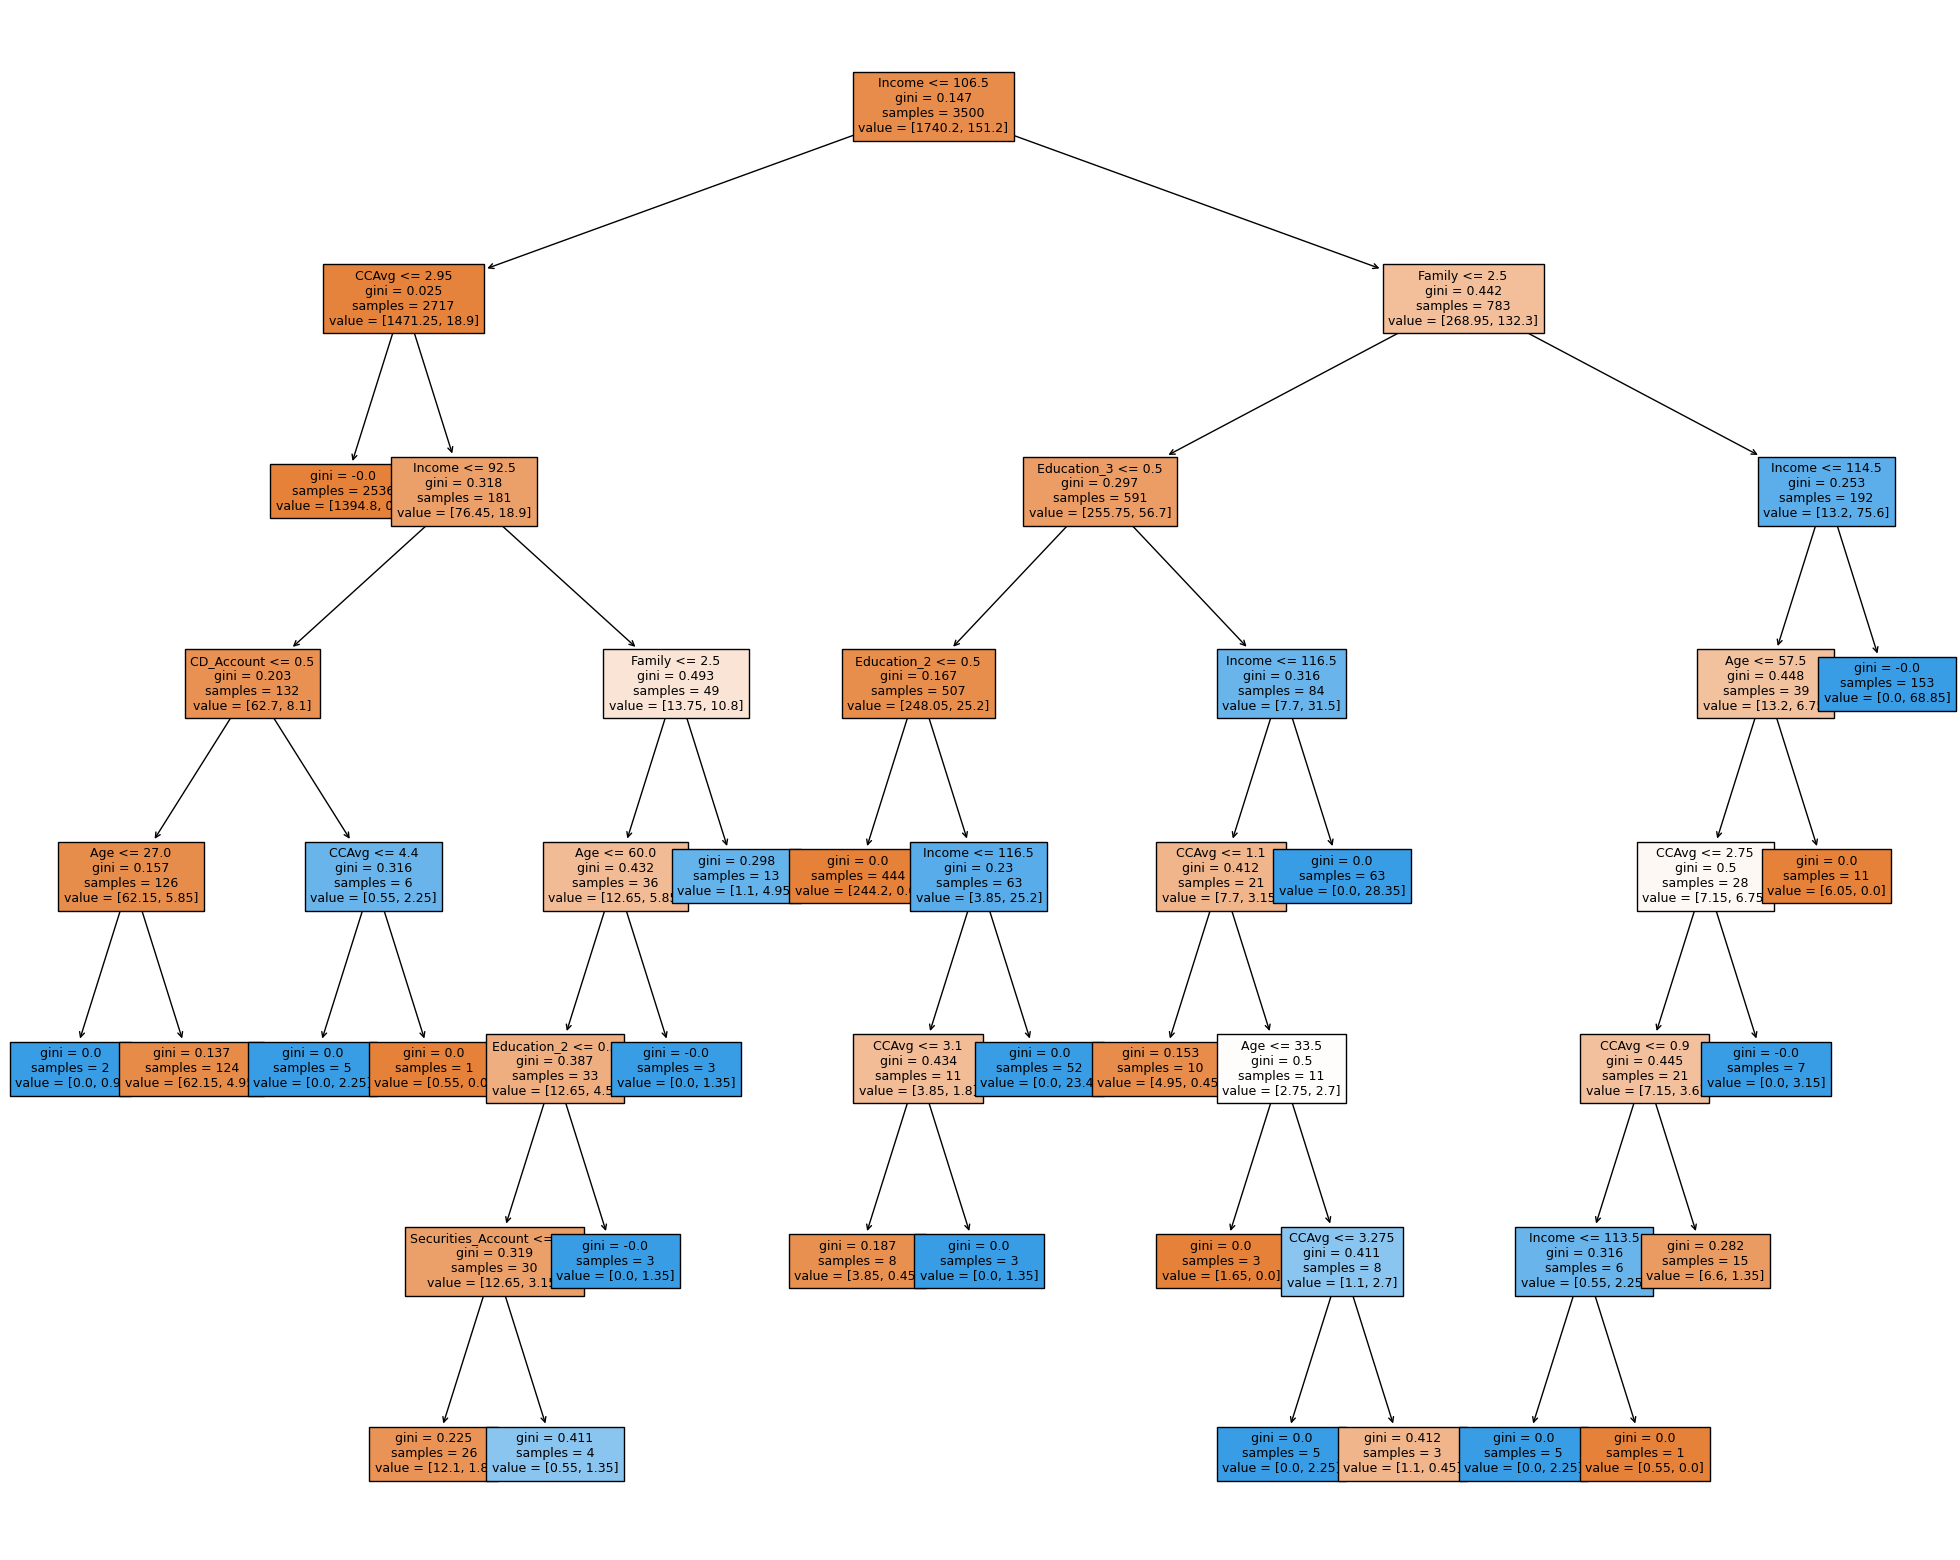

In [78]:
# Display the decision tree for the best pre-pruned model identified using manual iteration
display_tree(best_pre_prune_model_cv, (25, 20))

In [79]:
# Get the depth of the model
best_pre_prune_model_cv.get_depth()

7

* The depth of the tree is 7

In [80]:
# Print the rules in the decision tree
show_rules_in_tree(best_pre_prune_model_cv)

|--- Income <= 106.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1394.80, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 27.00
|   |   |   |   |   |--- weights: [0.00, 0.90] class: 1
|   |   |   |   |--- Age >  27.00
|   |   |   |   |   |--- weights: [62.15, 4.95] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- CCAvg <= 4.40
|   |   |   |   |   |--- weights: [0.00, 2.25] class: 1
|   |   |   |   |--- CCAvg >  4.40
|   |   |   |   |   |--- weights: [0.55, 0.00] class: 0
|   |   |--- Income >  92.50
|   |   |   |--- Family <= 2.50
|   |   |   |   |--- Age <= 60.00
|   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |   |   |   |--- weights: [12.10, 1.80] class: 0
|   |   |   |   |   |   |--- Securities_Account >  0.50
|   |   |   |   |   |   |   |--- weights: [0.55, 1.35] class: 1
|   |   |   |   |   |--- Education_2 >  

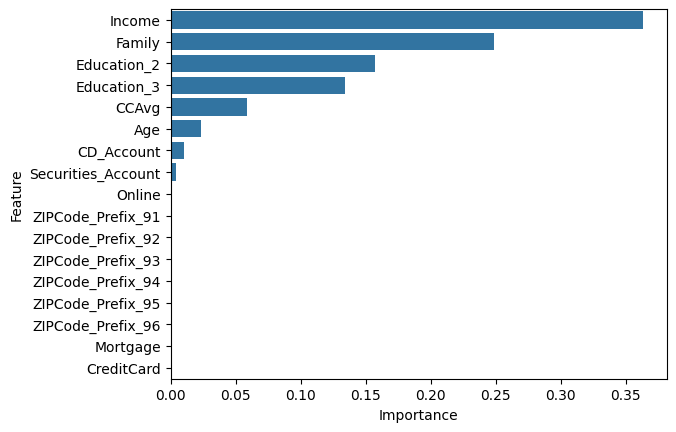

In [81]:
# Plot the feature importances
show_feature_importance(best_pre_prune_model_cv)

* Annual income and family size are the 2 most important features in the default decision tree.
* Level of education is also an important feature with Graduate and Advanced/Professional degree playing an important role
* Average spending on credit card per month and Age of the customers also have some role to play
* Having a CD account has some importance, but doesn't seem to play a huge role
* These observations are similar to a pre-pruned tree using a manual iterative method

##### Model performance on test data

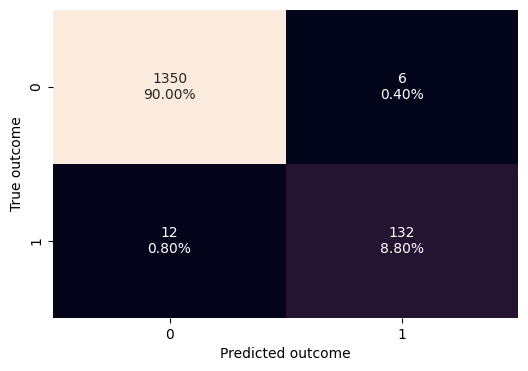

In [82]:
# For the test data, plot the confusion matrix for the best pre pruned model found through GridSearchCV
show_confusion_matrix(best_pre_prune_model_cv, x_test, y_test)

In [83]:
# For the test data, get the performance scores for the best pre pruned model found through GridSearchCV
pre_prune_model_cv_perf_test = evaluate_model_performance(best_pre_prune_model_cv, x_test, y_test)
pre_prune_model_cv_perf_test

Accracy    Recall  Precision       F1
0    0.988  0.916667   0.956522  0.93617

##### Observations on performance

In [84]:
pre_prune_model_cv_perf_train - pre_prune_model_cv_perf_test

Accracy    Recall  Precision        F1
0  0.005143  0.020833   0.034044  0.027133

* Difference between the Recall, Precision and F1 scores of the model for training and test data sets is less at about 2.08%, 3.4% and 2.7% respectively
* This model has higher Recall, Precision and F1 scores compared to the model identified through manual iterations
* But the difference in the scores for this model on the train and test data is a little bit higher compared to the differences observed for the model created through manual iteration
* This model is not generalizing too well compared to the model creation though manual iterations, but has better scores than that model

### Post-pruning

##### Identify and Observe CCP

In [85]:
# Initialize the model to be used to calculate the cost complexities, while using the class_weight defined earlier
model_for_ccp = DecisionTreeClassifier(random_state=42, class_weight=class_weight)

# Get the pruning path for the Decision Tree using the training data
path = model_for_ccp.cost_complexity_pruning_path(x_train, y_train)

# Get the values of ccp_alphas and the impurities and show them using a dataframe
ccp_alphas, impurities = path.ccp_alphas, path.impurities
pd.DataFrame(path)

ccp_alphas    impurities
0   0.000000e+00 -1.707201e-15
1   2.377288e-19 -1.706963e-15
2   7.131865e-19 -1.706250e-15
3   1.056573e-18 -1.705194e-15
4   1.646492e-18 -1.703547e-15
5   1.775629e-18 -1.701772e-15
6   1.937050e-18 -1.699835e-15
7   8.241266e-18 -1.691593e-15
8   5.016959e-16 -1.189897e-15
9   2.280967e-04  4.561933e-04
10  2.280967e-04  9.123866e-04
11  2.294789e-04  1.371344e-03
12  2.344930e-04  1.840330e-03
13  2.617109e-04  2.102041e-03
14  2.617109e-04  2.625463e-03
15  2.617109e-04  2.887174e-03
16  3.140531e-04  3.201227e-03
17  3.376915e-04  3.538919e-03
18  3.476311e-04  3.886550e-03
19  3.609806e-04  4.247530e-03
20  3.609806e-04  4.608511e-03
21  3.917127e-04  7.350500e-03
22  4.132277e-04  7.763728e-03
23  4.260410e-04  8.189769e-03
24  4.282542e-04  8.618023e-03
25  4.361848e-04  9.054208e-03
26  4.673409e-04  9.521548e-03
27  4.673409e-04  9.988889e-03
28  4.887640e-04  1.047765e-02
29  5.506000e-04  1.157885e-02
30  5.991266e-04  1.337623e-02
31  7.815065e-04  1.493925e-02
32  8.056380e-04  1.574488e-02
33  8.709334e-04  1.661582e-02
34  8.794540e-04  1.749527e-02
35  1.095351e-03  1.968597e-02
36  1.214703e-03  2.090068e-02
37  1.464114e-03  2.236479e-02
38  2.042415e-03  2.440721e-02
39  2.234546e-03  2.664175e-02
40  3.707930e-03  3.034968e-02
41  4.178932e-03  3.452861e-02
42  7.160487e-03  4.168910e-02
43  1.950061e-02  8.069031e-02
44  3.281120e-02  1.135015e-01
45  3.359900e-02  1.471005e-01

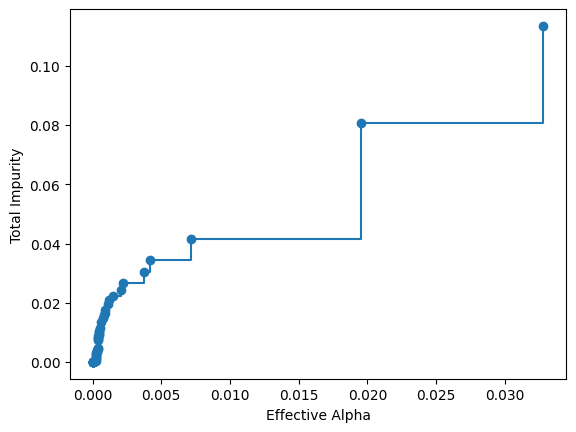

In [86]:
'''
While excluding the last ccp_alpha and last impurity as they are for the trivial tree with just one node,
draw a plot to visualize the impurities for an alpha score
'''
plt.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post");
plt.xlabel("Effective Alpha")
plt.ylabel("Total Impurity")
plt.show()

##### Decision Trees for CCP

In [87]:
'''
Loop through each ccp_alpha and create Decision Trees for each CCP alpha, and fit the trees using the training data
Use class_weight that has been defiend earlier
Store the trees in a list
'''
trees_based_on_ccp = []

for ccp_alpha in ccp_alphas:
    model_using_ccp = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha, class_weight=class_weight)
    model_using_ccp.fit(x_train, y_train)

    trees_based_on_ccp.append(model_using_ccp)

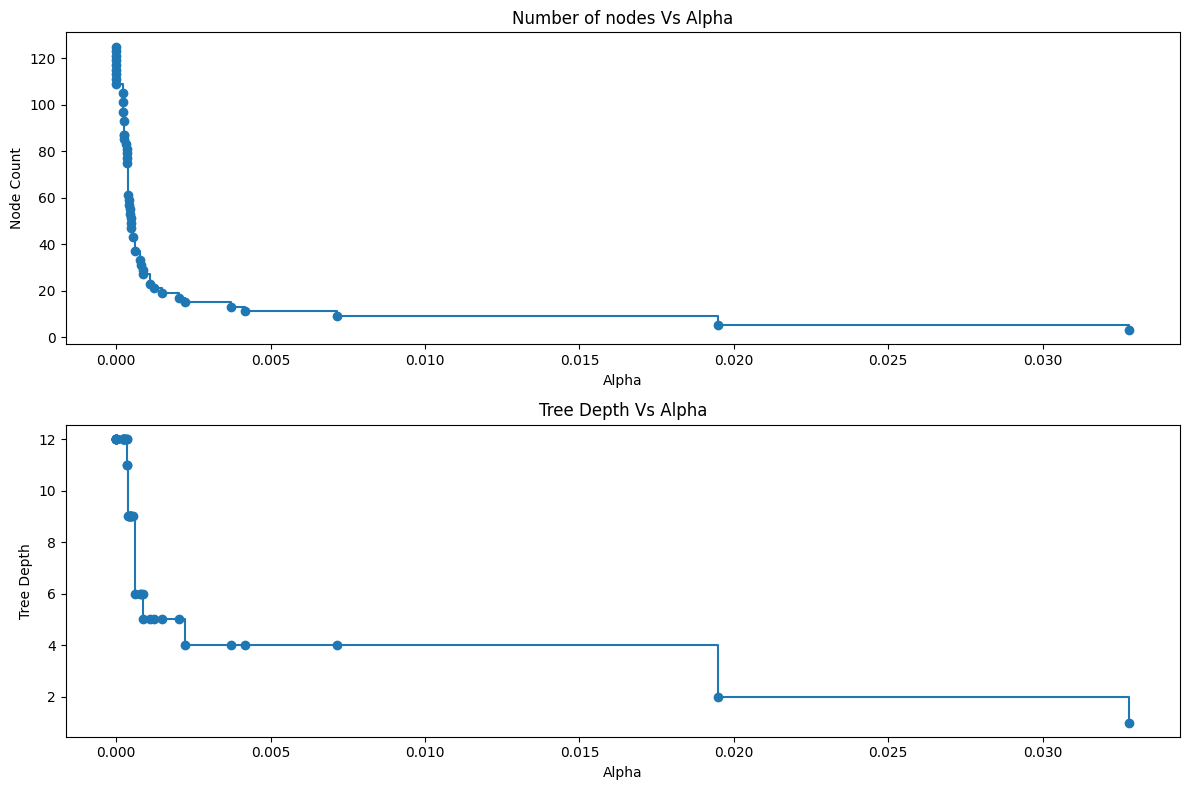

In [88]:
# Get ccp_alpha and corresponding Decision Trees for all the ccp_alphas, except for the last tree as it is the trivial tree with one node
ccp_alphas = ccp_alphas[:-1]
trees_based_on_ccp = trees_based_on_ccp[:-1]

# Get count of nodes and tree depths for each tree and store them in corresponding lists
node_counts = [tree_ccp.tree_.node_count for tree_ccp in trees_based_on_ccp]
depths = [tree_ccp.tree_.max_depth for tree_ccp in trees_based_on_ccp]

# Draw 2 plots, with 1 plot to visualize the count of nodes for ccp_alphas
fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Node Count")
ax[0].set_title("Number of nodes Vs Alpha")

# Draw another plot to visualize depth of the tree for ccp_alphas
ax[1].plot(ccp_alphas, depths, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Tree Depth")
ax[1].set_title("Tree Depth Vs Alpha")

# Add some gap between the 2 plots
fig.tight_layout()

##### Identify best post pruned model

In [89]:
# Calculate the F1 score for all the trees using the training data and store them in a list
f1_score_train = []

for tree_ccp in trees_based_on_ccp:
    y_train_pred = tree_ccp.predict(x_train)
    f1_score_train.append(f1_score(y_train, y_train_pred))

In [90]:
# Calculate the F1 score for all the trees using the test data and store them in a list
f1_score_test = []

for tree_ccp in trees_based_on_ccp:
    y_test_pred = tree_ccp.predict(x_test)
    f1_score_test.append(f1_score(y_test, y_test_pred))

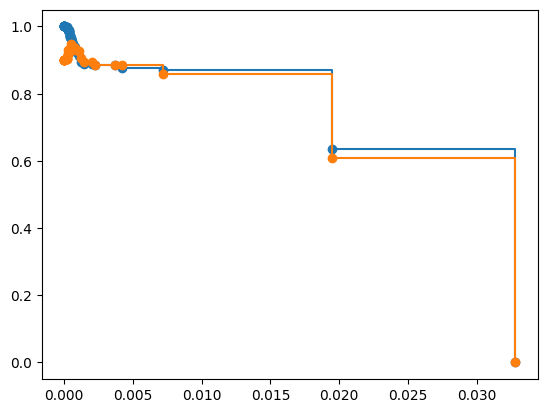

In [91]:
# Plot the F1 scores for the training and test data for observation
plt.plot(ccp_alphas, f1_score_train, marker="o", label="train", drawstyle="steps-post")
plt.plot(ccp_alphas, f1_score_test, marker="o", label="test", drawstyle="steps-post")

In [92]:
# Get the best F1 score for the test data set, and identify the best post pruned model using the index to which that score belongs
best_model_index = np.argmax(f1_score_test)
best_post_prune_model = trees_based_on_ccp[best_model_index]
best_post_prune_model

DecisionTreeClassifier(ccp_alpha=0.000488763993506148,
                       class_weight={0: 0.55, 1: 0.45}, random_state=42)

##### Model performance on training data

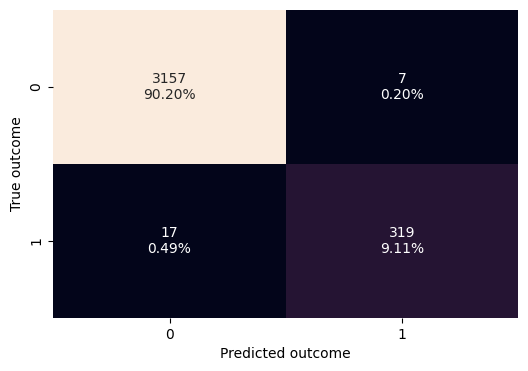

In [93]:
# For the training data, plot the confusion matrix for the best post pruned model
show_confusion_matrix(best_post_prune_model, x_train, y_train)

In [94]:
# For the training data, get the performance scores for the best post pruned model
post_prune_model_perf_train = evaluate_model_performance(best_post_prune_model, x_train, y_train)
post_prune_model_perf_train

Accracy    Recall  Precision        F1
0  0.993143  0.949405   0.978528  0.963746

##### Visualizing the Decision Tree

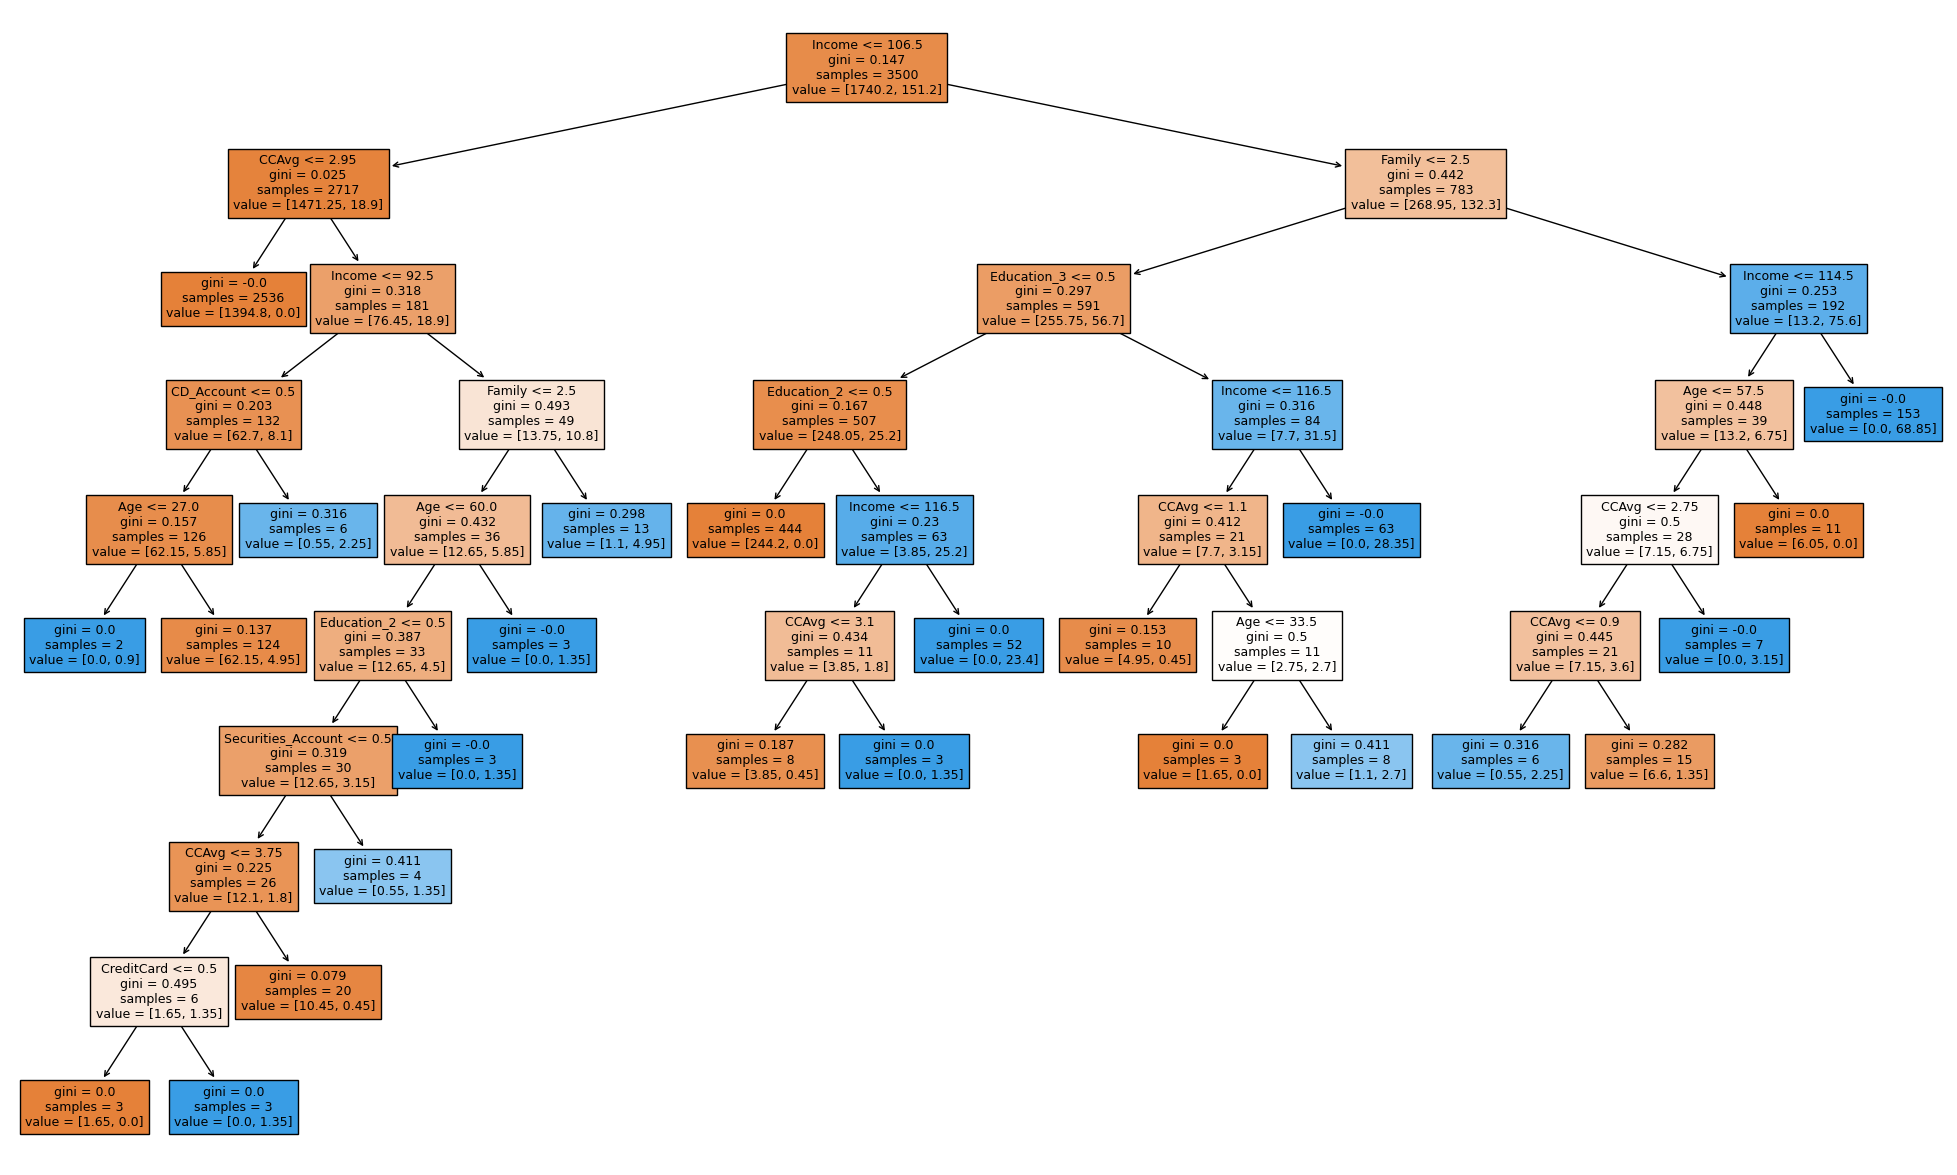

In [95]:
# Display the decision tree
display_tree(best_post_prune_model, (25, 15))

In [96]:
# Get the depth of the model
best_post_prune_model.get_depth()

9

* The depth of the tree is 9

In [97]:
# Print the rules in the decision tree
show_rules_in_tree(best_post_prune_model)

|--- Income <= 106.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1394.80, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 27.00
|   |   |   |   |   |--- weights: [0.00, 0.90] class: 1
|   |   |   |   |--- Age >  27.00
|   |   |   |   |   |--- weights: [62.15, 4.95] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.55, 2.25] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Family <= 2.50
|   |   |   |   |--- Age <= 60.00
|   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.75
|   |   |   |   |   |   |   |   |--- CreditCard <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [1.65, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- CreditCard >  0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.35] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  3.75
|   |

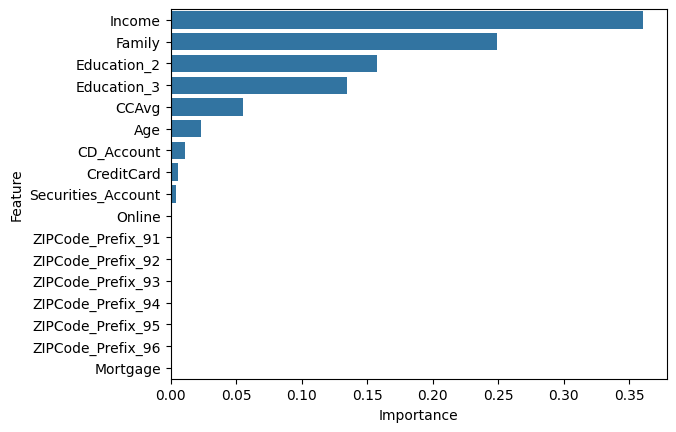

In [98]:
# Plot the feature importances
show_feature_importance(best_post_prune_model)

* Annual income and family size are the 2 most important features in the default decision tree.
* Level of education is also an important feature with Graduate and Advanced/Professional degree playing an important role
* Average spending on credit card per month and Age of the customers also have some role to play
* Having a CD account has some importance, but doesn't seem to play a huge role
* 153 Customers having a family size of 3 or more and annual income of more than 114.5K purchased loans
* 115 Customers having a family size of 2 or less, having a Graduate degree or Advanced/Professional degree and annual income of more than 116.5K purchased loans
* Lower income customers with less than 2.95K average spending on credit card per month are very less likely to purchase a loan


##### Model performance on test data

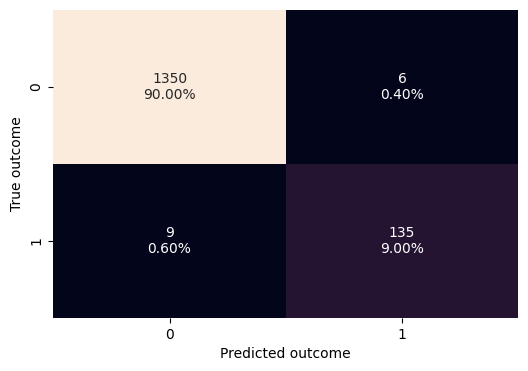

In [99]:
# For the test data, plot the confusion matrix for the best post pruned model
show_confusion_matrix(best_post_prune_model, x_test, y_test)

In [100]:
# For the test data, get the performance scores for the best post pruned model
post_prune_model_perf_test = evaluate_model_performance(best_post_prune_model, x_test, y_test)
post_prune_model_perf_test

Accracy  Recall  Precision        F1
0     0.99  0.9375   0.957447  0.947368

##### Observations on performance

In [101]:
# Check the difference in the performance measures
post_prune_model_perf_train - post_prune_model_perf_test

Accracy    Recall  Precision        F1
0  0.003143  0.011905   0.021081  0.016378

* Difference between the Recall, Precision and F1 scores of the model for training and test data sets is less at about 1.19%, 2.1% and 1.63% respectively
* This model seems to be fairly generalizing the result

## Model Performance Comparison and Final Model Selection

**Let's compare the performance of the trees on the training dataset**

In [102]:
# Create and print a dataframe with the training dataset performances of the 4 models -
# default, pre-pruned with manual iteration, pre-pruned with CVGridSearch and post-pruned trees
models_train_performance = pd.concat([default_model_train_performance.T, pre_prune_model_manual_itr_perf_train.T, pre_prune_model_cv_perf_train.T, post_prune_model_perf_train.T], axis=1)
models_train_performance.columns = ['Default Tree', 'Pre-Pruned Tree (Manual Iteration)', 'Pre-Pruned Tree (GridSearchCV)', 'Post-Pruned Tree']
print("Performance comparison of the trees on training dataset")
models_train_performance

Performance comparison of the trees on training dataset


Default Tree  Pre-Pruned Tree (Manual Iteration)  \
Accracy             1.0                            0.990857   
Recall              1.0                            0.922619   
Precision           1.0                            0.981013   
F1                  1.0                            0.950920   

           Pre-Pruned Tree (GridSearchCV)  Post-Pruned Tree  
Accracy                          0.993143          0.993143  
Recall                           0.937500          0.949405  
Precision                        0.990566          0.978528  
F1                               0.963303          0.963746

**Let's compare the performance of the trees on the test dataset**

In [103]:
# Create and print a dataframe with the test dataset performances of the 4 models -
# default, pre-pruned with manual iteration, pre-pruned with CVGridSearch and post-pruned trees
models_test_performance = pd.concat([default_model_test_performance.T, pre_prune_model_manual_itr_perf_test.T, pre_prune_model_cv_perf_test.T, post_prune_model_perf_test.T], axis=1)
models_test_performance.columns = ['Default Tree', 'Pre-Pruned Tree (Manual Iteration)', 'Pre-Pruned Tree (GridSearchCV)', 'Post-Pruned Tree']
print("Performance comparison of the trees on test dataset")
models_test_performance

Performance comparison of the trees on test dataset


Default Tree  Pre-Pruned Tree (Manual Iteration)  \
Accracy        0.981333                            0.988000   
Recall         0.888889                            0.909722   
Precision      0.914286                            0.963235   
F1             0.901408                            0.935714   

           Pre-Pruned Tree (GridSearchCV)  Post-Pruned Tree  
Accracy                          0.988000          0.990000  
Recall                           0.916667          0.937500  
Precision                        0.956522          0.957447  
F1                               0.936170          0.947368

Let's check the difference of the scores between the training and test datasets for all the trees

In [104]:
# Show the difference between the performance of the models on training and test datasets
train_test_performance_difference = models_train_performance - models_test_performance
train_test_performance_difference

Default Tree  Pre-Pruned Tree (Manual Iteration)  \
Accracy        0.018667                            0.002857   
Recall         0.111111                            0.012897   
Precision      0.085714                            0.017777   
F1             0.098592                            0.015206   

           Pre-Pruned Tree (GridSearchCV)  Post-Pruned Tree  
Accracy                          0.005143          0.003143  
Recall                           0.020833          0.011905  
Precision                        0.034044          0.021081  
F1                               0.027133          0.016378

#### Observations:

* All of the decision trees have a lower performance on test dataset compared to the training dataset
* Default tree has the worst performing model
* Post-pruned tree has the best performing model based on the scores.
 * It has higher Accuracy, Recall and F1 scores on both the training and test datasets amongst all the trees
 * Pre-pruned tree with manual iteration has slightly higher precision on both the training (0.2%) and test (0.5%) dataset compared to the post-pruned tree
* Pre-pruned tree with manual iteration has the least difference between the Accuracy, Precision and F1 scores between the training and test datasets
* The Post-pruned tree has almost similar differences and better overall scores
* With our focus on keeping False Positives and False Negatives in check we will use the Post-pruned tree as our best model as it is having the best F1 score for both training and test datasets
* All the models are identifying Income as the most important feature, followed by Family size and level of education

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

### Insights

* Only about 9.5% of the customers have a personal loan
* About 29% of the customers have a credit card with another bank
* Customers with family size of 3 or 4 have more personal loans compared to customers with family size of 1 or 2
* Customer's interest in purchasing a loan seems to increase with the increase in level of education, with customers having Advanced/Professional degree buying the most number of personal loans
* Customer's interest in purchasing loan appears to increase as the Income, Average spending on credit card goes up.
* Customer's interest in purchasing a loan doesn't seem to depend too much on the age of the customer
* Customers with an income of more than 106.5K purchased more loans compared to customers having lesser income.

Factors contributing the most to customer's interest in purchasing a loan:
* Income of a customer is the most important feature to identify customer's ability and interest to purchase a loan.
* Family size and level of education are also playing an important role in customer's interest to purchase a loan.

### Recommendations

Bank should target the below segments of the customers to advertise about the personal loans:
* Customers having a family size of 3 or more and annual income of more than 114.5K
* Customers having a family size of 2 or less, having a Graduate degree or Advanced/Professional degree and annual income of more than 116.5K

Bank should avoid reaching out to lower income customers who are having less than 2.95K average spending on credit card per month, as they are very less likely to purchase a loan

## <a name='link1'>Performance of Models with other class weights</a>

Multiple values for class_weights had been tried to arrive at the best performing model. In the following sections, we will see the performance of the models on training and test dataset with other values of class_weights that were tried

#### Performance of models with no class weight

Let's compare the performance of all the models when class_weights was None

* Performance on the training data

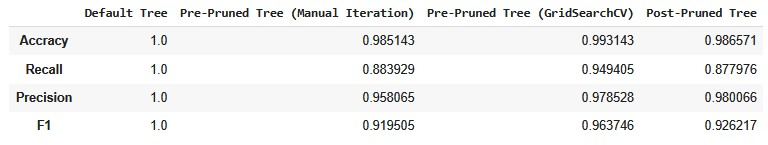

* Performance on the test data set

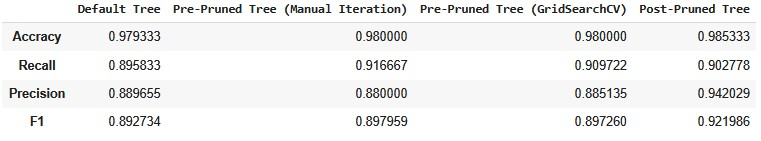

Observations on post-pruned tree:
* There is a difference of about 0.4% in the F1 scores of the training and test data sets
* Recall is up by about 2.4% on the test data set
* Precision is down by about 3.8% on the test data set
* The model is generalizing the results fairly

#### Performance of models with 'balanced' class weight





Let's compare the performance of all the models when class_weights was 'balanced'

* Performance on the training data

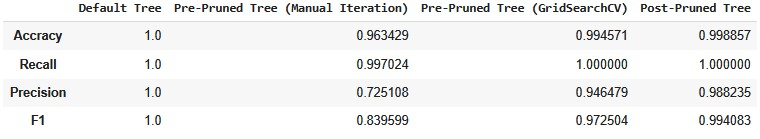

* Performance on the test data set

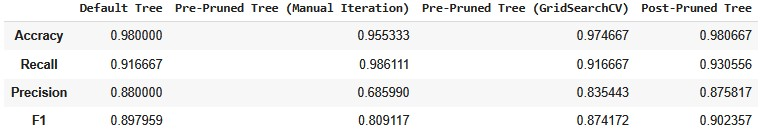

Observations on post pruned tree:
* F1 score is down by about 9.1% on the test data set, which is a big drop
* Recall is down by about 6.9% on the test data set
* Precision is down by about 11.2% on the test data set, which is again a big drop
* The model overfitting the data by a big margin

Pre-pruned trees have considerably precision. Although they have high recall, using them may result into lot of False Positives, and may result into bad customer experience for a lot of customers.

#### Performance of models with custom class weight {0: 0.45, 1: 0.55}

Let's compare the performance of all the models when class_weights was {0: 0.45, 1:0.55}

* Performance on the training data set

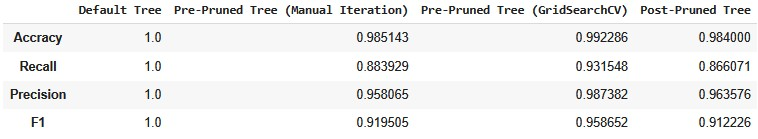

* Performance on the test data set

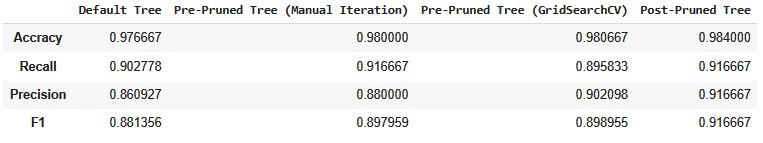

Observations on post pruned tree:
* F1 score is up by about 0.4% on the test data set
* Recall is up by about 5% on the test data set
* Precision is down by about 4.6% on the test data set, which is again a big drop
* The model is generalizing the F1 score, but the Recall and Precision have more difference

#### Performance of models with custom class weight {0: 0.55, 1: 0.45}

Let's compare the performance of all the models when class_weights was {0: 0.55, 1:0.45}

* Performance on the training data set

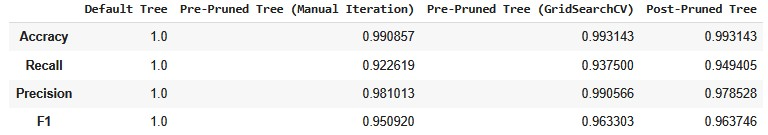

* Performance on the test data set

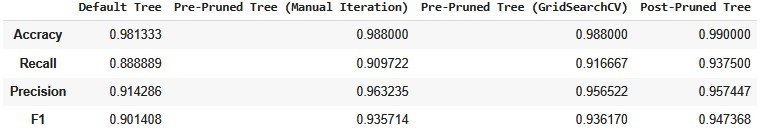

Observations on post pruned tree:
* F1 score is up by about 1.6% on the test data set
* Recall is down by 1.1% on the test data set
* Precision is down by about 2.1% on the test data set
* The model is having high scores with less differences between training and test dataset for all the metrics, and seems to be generalizing well

#### Outcome

* While using 'balanced' class weight, the recall score was high but the precision score was very low, thus dragging down the F1 score. This would have resulted into too many False Positives, and possibly resulting into a low success ratio and a negative customer experience
* Models for other class weights fared well, but the best performing models were created when the class weights were {0: 0.55, 1: 0.45}. The models with this class weight had the best performance metrics amongst all the class weight options

___